# Import dataset

In [22]:
# Import library and model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU

In [23]:
# Import Dataset
 # EUR - VND
eur = pd.read_csv('EUR_VND.csv')
 # GBP - VND
gbp = pd.read_csv("GBP_VND.csv")
 # JPY - VND
jpy = pd.read_csv("JPY_VND.csv")
# Convert
eur = eur['Sale'].replace({',':''}, regex=True).astype(float)
gbp = gbp['Sale'].replace({',':''}, regex=True).astype(float)
jpy = jpy['Sale'].replace({',':''}, regex=True).astype(float)

In [24]:
# Split train, test, validate data
#### EUR - VND
  # case 1. 7:3
train_eur_1 = eur[:int(0.7*len(eur))]
test_eur_1 = eur[int(0.7*len(eur)):]
  # case 2. 8:2
train_eur_2 = eur[:int(0.8*len(eur))]
test_eur_2 = eur[int(0.8*len(eur)):]
  # case 3. 9:1
train_eur_3 = eur[:int(0.9*len(eur))]
test_eur_3 = eur[int(0.9*len(eur)):]
#### GBP - VND
  # case 1. 7:3
train_gbp_1 = gbp[:int(0.7*len(gbp))]
test_gbp_1 = gbp[int(0.7*len(gbp)):]
  # case 2. 8:2
train_gbp_2 = gbp[:int(0.8*len(gbp))]
test_gbp_2 = gbp[int(0.8*len(gbp)):]
  # case 3. 9:1
train_gbp_3 = gbp[:int(0.9*len(gbp))]
test_gbp_3 = gbp[int(0.9*len(gbp)):]
#### JPY - VND
  # case 1. 7:3
train_jpy_1 = jpy[:int(0.7*len(jpy))]
test_jpy_1 = jpy[int(0.7*len(jpy)):]
  # case 2. 8:2
train_jpy_2 = jpy[:int(0.8*len(jpy))]
test_jpy_2 = jpy[int(0.8*len(jpy)):]
  # case 3. 9:1
train_jpy_3 = jpy[:int(0.9*len(jpy))]
test_jpy_3 = jpy[int(0.9*len(jpy)):]

# Scale data

In [25]:
# Scale data
 # Scaler model
scaler=MinMaxScaler(feature_range=(0,1))
 # EUR - VND
eur_sc = scaler.fit_transform(np.array(eur).reshape(-1,1))
 # GBP - VND
gbp_sc = scaler.fit_transform(np.array(gbp).reshape(-1,1))
 # JPY - VND
jpy_sc = scaler.fit_transform(np.array(jpy).reshape(-1,1))

In [26]:
# Split train, test, validate data
#### EUR - VND
  # case 1. 7:3
train_eur_1_sc = eur_sc[:int(0.7*len(eur))]
test_eur_1_sc = eur_sc[int(0.7*len(eur)):]
  # case 2. 8:2
train_eur_2_sc = eur_sc[:int(0.8*len(eur))]
test_eur_2_sc = eur_sc[int(0.8*len(eur)):]
  # case 3. 9:1
train_eur_3_sc = eur_sc[:int(0.9*len(eur))]
test_eur_3_sc = eur_sc[int(0.9*len(eur)):]
#### GBP - VND
  # case 1. 7:3
train_gbp_1_sc = gbp_sc[:int(0.7*len(gbp))]
test_gbp_1_sc = gbp_sc[int(0.7*len(gbp)):]
  # case 2. 8:2
train_gbp_2_sc = gbp_sc[:int(0.8*len(gbp))]
test_gbp_2_sc = gbp_sc[int(0.8*len(gbp)):]
  # case 3. 9:1
train_gbp_3_sc = gbp_sc[:int(0.9*len(gbp))]
test_gbp_3_sc = gbp_sc[int(0.9*len(gbp)):]
#### JPY - VND
  # case 1. 7:3
train_jpy_1_sc = jpy_sc[:int(0.7*len(jpy))]
test_jpy_1_sc = jpy_sc[int(0.7*len(jpy)):]
  # case 2. 8:2
train_jpy_2_sc = jpy_sc[:int(0.8*len(jpy))]
test_jpy_2_sc = jpy_sc[int(0.8*len(jpy)):]
  # case 3. 9:1
train_jpy_3_sc = jpy_sc[:int(0.9*len(jpy))]
test_jpy_3_sc = jpy_sc[int(0.9*len(jpy)):]

# Functions

In [44]:
def standardizate_data(train, test, pre_test, f30, f60, f90):
  train = np.reshape(train, (-1,1))
  train1 = scaler.inverse_transform(train)

  test = np.reshape(test, (-1,1))
  test1 = scaler.inverse_transform(test)

  pre_test = np.reshape(pre_test, (-1,1))
  pre_test1 = scaler.inverse_transform(pre_test)

  f30 = np.reshape(f30, (-1,1))
  f30_1 = scaler.inverse_transform(f30)
   
  f60 = np.reshape(f60, (-1,1))
  f60_1 = scaler.inverse_transform(f60)
  
  f90 = np.reshape(f90, (-1,1))
  f90_1 = scaler.inverse_transform(f90)
    
  return train1, test1, pre_test1, f30_1, f60_1, f90_1

In [28]:
# Model Accuracy Evaluation Function
def accuracy(forecast, actual):
    forecast = np.array(forecast)
    actual = np.array(actual)
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))*100  # MAPE
    mae = np.mean(np.abs(forecast - actual))    # MAE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE

    print('RMSE =',rmse)
    print('MAPE =',mape)
    print('MAE =',mae)

In [29]:
# Function to convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

# Function to convert data
def convert_data(train, test, time_step):
    # Reshape into X = t, t+1, t+2 ,..., t+99 and Y = t+100
    X_train, y_train = create_dataset(train, time_step)
    X_test, y_test = create_dataset(test, time_step)
    # Reshape input to be [samples, time steps, features] which is required for LSTM
    X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)  # => 3D
    X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
    return X_train, y_train, X_test, y_test

# GRU (Gated Recurrent Units)


In [40]:
# Hàm dự báo 30 ngày tiếp theo
def forecast_days(model, test):
  x_input = test[len(test)-100:].reshape(1,-1)

  temp_input=list(x_input)
  temp_input=temp_input[0].tolist()

  f30=[]
  f60=[]
  f90=[]
  n_steps=100
  i=0
  while(i<=90):
      if(len(temp_input)>100):
          x_input=np.array(temp_input[1:])
          print("{} day input {}".format(i,x_input))
          x_input = x_input.reshape(1,-1)
          x_input = x_input.reshape((1, n_steps, 1)) #3D
          yhat = model.predict(x_input, verbose=0)
          print("{} day output {}".format(i,yhat))
          temp_input.extend(yhat[0].tolist())
          temp_input=temp_input[1:]
          if i <= 30:
            f30.extend(yhat.tolist())
          elif i <= 60:
            f60.extend(yhat.tolist())
          else:
            f90.extend(yhat.tolist())
          i=i+1
      else:
          x_input = x_input.reshape((1, n_steps, 1))
          yhat = model.predict(x_input, verbose=0)
          print(yhat[0])
          temp_input.extend(yhat[0].tolist())
          print(len(temp_input))
          f30.extend(yhat.tolist())
          i=i+1
  return f30, f60, f90

In [41]:
# Hàm trực quan hóa model
def visualize_GRU(model, train, test, pre_test, f30, f60, f90):
  # set index
  train_index = pd.RangeIndex(start=0, stop=len(train), step=1)
  test_index = pd.RangeIndex(start=len(train), stop=len(train)+len(test), step=1)
  pre_test_index = pd.RangeIndex(start=len(train)+101, stop=len(train)+len(test), step=1)
    
  f30_index = pd.RangeIndex(start=len(train)+len(test)-1, stop=len(train)+len(test)+30, step=1)
  f60_index = pd.RangeIndex(start=len(train)+len(test)+30, stop=len(train)+len(test)+60, step=1)
  f90_index = pd.RangeIndex(start=len(train)+len(test)+60, stop=len(train)+len(test)+90, step=1)

  
  # Visualize
  plt.plot(train_index, scaler.inverse_transform(train))
  plt.plot(test_index, scaler.inverse_transform(test))
  plt.plot(pre_test_index,scaler.inverse_transform(pre_test))
  plt.plot(f30_index, scaler.inverse_transform(f30))
  plt.plot(f60_index, scaler.inverse_transform(f60))
  plt.plot(f90_index, scaler.inverse_transform(f90))
  plt.title('GRU Time Series Forecast')
  plt.xlabel('Date')
  plt.ylabel('Exchange Rate (VND)')
  plt.legend(['Train','Test','TestPred','ForecastNext30Days','ForecastNext60Days','ForecastNext90Days'])
  plt.show()

In [54]:
def implementGRU(train, test):
  time_step = 100
  X_train, y_train, X_test, y_test = convert_data(train, test, time_step)
  # Define GRU Model
  model = Sequential()
  model.add(GRU(64, input_shape=(time_step, 1)))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss='mean_squared_error')

  # Fit model
  model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)
  pre_test = model.predict(X_test)
  f30, f60, f90 = forecast_days(model, test)
  visualize_GRU(model, train, test, pre_test, f30, f60, f90)
  train, test, pre_test, f30, f60, f90 = standardizate_data(train, test, pre_test, f30, f60, f90)

  test1 = test[101:]
  print('- Model accuracy evaluation: ')
  accuracy(pre_test, test1)

**EUR_VND**

* Case 7:3

Epoch 1/100


C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.1969 - val_loss: 0.0271
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0170 - val_loss: 0.0023
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0056 - val_loss: 0.0025
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0038 - val_loss: 9.3030e-04
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0025 - val_loss: 9.5541e-04
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0018 - val_loss: 6.7517e-04
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0013 - val_loss: 5.0672e-04
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 9.2245e-04 - val_loss: 4.6793e-04
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 6.9332e-04 - val_loss: 4.4027e-04
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 6.1568e-04 - val_loss: 4.3304e-04
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 5.6644e-04 - val_loss: 4.3295e-04
Epoch 12/100
19/

Epoch 65/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 3.5843e-04 - val_loss: 3.0615e-04
Epoch 66/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 3.4883e-04 - val_loss: 3.0682e-04
Epoch 67/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 3.6596e-04 - val_loss: 3.1327e-04
Epoch 68/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 3.7851e-04 - val_loss: 3.3764e-04
Epoch 69/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 4.1423e-04 - val_loss: 3.0580e-04
Epoch 70/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 3.5274e-04 - val_loss: 3.1718e-04
Epoch 71/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 3.8043e-04 - val_loss: 3.0476e-04
Epoch 72/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 3.9904e-04 - val_loss: 3.1250e-04
Epoch 73/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 3.6459e-04 - val_loss: 3.0613e-04
Epoch 74/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 3.6012e-04 - val_loss: 3.0329e-04
Epoch 75/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/st

4 day output [[0.7286824]]
5 day input [0.68284045 0.70161148 0.68142376 0.66920489 0.66920489 0.66920489
 0.65078803 0.64087126 0.62156897 0.61607933 0.60651673 0.60651673
 0.60651673 0.60208961 0.61572516 0.61962104 0.66495484 0.69045511
 0.69045511 0.69045511 0.69328847 0.70391358 0.70462192 0.69612183
 0.70586152 0.70586152 0.70586152 0.7156012  0.72321587 0.74340358
 0.75934124 0.72534089 0.72534089 0.72534089 0.72675757 0.73649726
 0.70426775 0.7108199  0.69488224 0.69488224 0.69488224 0.69116345
 0.70019479 0.71471578 0.7311847  0.74057021 0.74057021 0.74057021
 0.72604923 0.71383035 0.7012573  0.70798654 0.7072782  0.7072782
 0.7072782  0.71737206 0.71648663 0.72073667 0.72976802 0.70391358
 0.70391358 0.70391358 0.68691341 0.65344431 0.66477776 0.64582964
 0.67115282 0.67115282 0.67115282 0.62652736 0.61590225 0.63591287
 0.6415796  0.63998583 0.63998583 0.63998583 0.64140251 0.6367983
 0.60917301 0.62705862 0.66265274 0.66265274 0.66265274 0.66584027
 0.6607048  0.66973614 0.

12 day output [[0.7716739]]
13 day input [0.62156897 0.61607933 0.60651673 0.60651673 0.60651673 0.60208961
 0.61572516 0.61962104 0.66495484 0.69045511 0.69045511 0.69045511
 0.69328847 0.70391358 0.70462192 0.69612183 0.70586152 0.70586152
 0.70586152 0.7156012  0.72321587 0.74340358 0.75934124 0.72534089
 0.72534089 0.72534089 0.72675757 0.73649726 0.70426775 0.7108199
 0.69488224 0.69488224 0.69488224 0.69116345 0.70019479 0.71471578
 0.7311847  0.74057021 0.74057021 0.74057021 0.72604923 0.71383035
 0.7012573  0.70798654 0.7072782  0.7072782  0.7072782  0.71737206
 0.71648663 0.72073667 0.72976802 0.70391358 0.70391358 0.70391358
 0.68691341 0.65344431 0.66477776 0.64582964 0.67115282 0.67115282
 0.67115282 0.62652736 0.61590225 0.63591287 0.6415796  0.63998583
 0.63998583 0.63998583 0.64140251 0.6367983  0.60917301 0.62705862
 0.66265274 0.66265274 0.66265274 0.66584027 0.6607048  0.66973614
 0.71524703 0.70940322 0.70940322 0.70940322 0.71985125 0.7168408
 0.69559058 0.71489286 

21 day output [[0.8220853]]
22 day input [0.69045511 0.69045511 0.69045511 0.69328847 0.70391358 0.70462192
 0.69612183 0.70586152 0.70586152 0.70586152 0.7156012  0.72321587
 0.74340358 0.75934124 0.72534089 0.72534089 0.72534089 0.72675757
 0.73649726 0.70426775 0.7108199  0.69488224 0.69488224 0.69488224
 0.69116345 0.70019479 0.71471578 0.7311847  0.74057021 0.74057021
 0.74057021 0.72604923 0.71383035 0.7012573  0.70798654 0.7072782
 0.7072782  0.7072782  0.71737206 0.71648663 0.72073667 0.72976802
 0.70391358 0.70391358 0.70391358 0.68691341 0.65344431 0.66477776
 0.64582964 0.67115282 0.67115282 0.67115282 0.62652736 0.61590225
 0.63591287 0.6415796  0.63998583 0.63998583 0.63998583 0.64140251
 0.6367983  0.60917301 0.62705862 0.66265274 0.66265274 0.66265274
 0.66584027 0.6607048  0.66973614 0.71524703 0.70940322 0.70940322
 0.70940322 0.71985125 0.7168408  0.69559058 0.71489286 0.69966354
 0.70915014 0.71350032 0.71840185 0.72350025 0.7286824  0.73391616
 0.73919648 0.74452013

29 day output [[0.86767507]]
30 day input [0.70586152 0.70586152 0.7156012  0.72321587 0.74340358 0.75934124
 0.72534089 0.72534089 0.72534089 0.72675757 0.73649726 0.70426775
 0.7108199  0.69488224 0.69488224 0.69488224 0.69116345 0.70019479
 0.71471578 0.7311847  0.74057021 0.74057021 0.74057021 0.72604923
 0.71383035 0.7012573  0.70798654 0.7072782  0.7072782  0.7072782
 0.71737206 0.71648663 0.72073667 0.72976802 0.70391358 0.70391358
 0.70391358 0.68691341 0.65344431 0.66477776 0.64582964 0.67115282
 0.67115282 0.67115282 0.62652736 0.61590225 0.63591287 0.6415796
 0.63998583 0.63998583 0.63998583 0.64140251 0.6367983  0.60917301
 0.62705862 0.66265274 0.66265274 0.66265274 0.66584027 0.6607048
 0.66973614 0.71524703 0.70940322 0.70940322 0.70940322 0.71985125
 0.7168408  0.69559058 0.71489286 0.69966354 0.70915014 0.71350032
 0.71840185 0.72350025 0.7286824  0.73391616 0.73919648 0.74452013
 0.74988312 0.75528204 0.76071507 0.76617998 0.77167392 0.77719504
 0.78274089 0.78830945 

38 day output [[0.9189034]]
39 day input [0.72675757 0.73649726 0.70426775 0.7108199  0.69488224 0.69488224
 0.69488224 0.69116345 0.70019479 0.71471578 0.7311847  0.74057021
 0.74057021 0.74057021 0.72604923 0.71383035 0.7012573  0.70798654
 0.7072782  0.7072782  0.7072782  0.71737206 0.71648663 0.72073667
 0.72976802 0.70391358 0.70391358 0.70391358 0.68691341 0.65344431
 0.66477776 0.64582964 0.67115282 0.67115282 0.67115282 0.62652736
 0.61590225 0.63591287 0.6415796  0.63998583 0.63998583 0.63998583
 0.64140251 0.6367983  0.60917301 0.62705862 0.66265274 0.66265274
 0.66265274 0.66584027 0.6607048  0.66973614 0.71524703 0.70940322
 0.70940322 0.70940322 0.71985125 0.7168408  0.69559058 0.71489286
 0.69966354 0.70915014 0.71350032 0.71840185 0.72350025 0.7286824
 0.73391616 0.73919648 0.74452013 0.74988312 0.75528204 0.76071507
 0.76617998 0.77167392 0.77719504 0.78274089 0.78830945 0.79389822
 0.79950631 0.80513102 0.81077027 0.81642246 0.82208532 0.82775909
 0.83344322 0.83913571

49 day output [[0.97983646]]
50 day input [0.74057021 0.74057021 0.74057021 0.72604923 0.71383035 0.7012573
 0.70798654 0.7072782  0.7072782  0.7072782  0.71737206 0.71648663
 0.72073667 0.72976802 0.70391358 0.70391358 0.70391358 0.68691341
 0.65344431 0.66477776 0.64582964 0.67115282 0.67115282 0.67115282
 0.62652736 0.61590225 0.63591287 0.6415796  0.63998583 0.63998583
 0.63998583 0.64140251 0.6367983  0.60917301 0.62705862 0.66265274
 0.66265274 0.66265274 0.66584027 0.6607048  0.66973614 0.71524703
 0.70940322 0.70940322 0.70940322 0.71985125 0.7168408  0.69559058
 0.71489286 0.69966354 0.70915014 0.71350032 0.71840185 0.72350025
 0.7286824  0.73391616 0.73919648 0.74452013 0.74988312 0.75528204
 0.76071507 0.76617998 0.77167392 0.77719504 0.78274089 0.78830945
 0.79389822 0.79950631 0.80513102 0.81077027 0.81642246 0.82208532
 0.82775909 0.83344322 0.83913571 0.84483528 0.85054004 0.85624945
 0.86196178 0.86767507 0.87338829 0.87909973 0.88480711 0.89050955
 0.89620507 0.9018936

59 day output [[1.0317627]]
60 day input [0.71737206 0.71648663 0.72073667 0.72976802 0.70391358 0.70391358
 0.70391358 0.68691341 0.65344431 0.66477776 0.64582964 0.67115282
 0.67115282 0.67115282 0.62652736 0.61590225 0.63591287 0.6415796
 0.63998583 0.63998583 0.63998583 0.64140251 0.6367983  0.60917301
 0.62705862 0.66265274 0.66265274 0.66265274 0.66584027 0.6607048
 0.66973614 0.71524703 0.70940322 0.70940322 0.70940322 0.71985125
 0.7168408  0.69559058 0.71489286 0.69966354 0.70915014 0.71350032
 0.71840185 0.72350025 0.7286824  0.73391616 0.73919648 0.74452013
 0.74988312 0.75528204 0.76071507 0.76617998 0.77167392 0.77719504
 0.78274089 0.78830945 0.79389822 0.79950631 0.80513102 0.81077027
 0.81642246 0.82208532 0.82775909 0.83344322 0.83913571 0.84483528
 0.85054004 0.85624945 0.86196178 0.86767507 0.87338829 0.87909973
 0.88480711 0.89050955 0.89620507 0.90189368 0.90757525 0.91324538
 0.91890341 0.92454714 0.93017596 0.93578899 0.94138211 0.94695508
 0.95250475 0.95802933 

67 day output [[1.0696927]]
68 day input [0.65344431 0.66477776 0.64582964 0.67115282 0.67115282 0.67115282
 0.62652736 0.61590225 0.63591287 0.6415796  0.63998583 0.63998583
 0.63998583 0.64140251 0.6367983  0.60917301 0.62705862 0.66265274
 0.66265274 0.66265274 0.66584027 0.6607048  0.66973614 0.71524703
 0.70940322 0.70940322 0.70940322 0.71985125 0.7168408  0.69559058
 0.71489286 0.69966354 0.70915014 0.71350032 0.71840185 0.72350025
 0.7286824  0.73391616 0.73919648 0.74452013 0.74988312 0.75528204
 0.76071507 0.76617998 0.77167392 0.77719504 0.78274089 0.78830945
 0.79389822 0.79950631 0.80513102 0.81077027 0.81642246 0.82208532
 0.82775909 0.83344322 0.83913571 0.84483528 0.85054004 0.85624945
 0.86196178 0.86767507 0.87338829 0.87909973 0.88480711 0.89050955
 0.89620507 0.90189368 0.90757525 0.91324538 0.91890341 0.92454714
 0.93017596 0.93578899 0.94138211 0.94695508 0.95250475 0.95802933
 0.96352708 0.96899533 0.97443217 0.97983646 0.9852069  0.99054295
 0.99584258 1.0011049

76 day output [[1.107347]]
77 day input [0.6415796  0.63998583 0.63998583 0.63998583 0.64140251 0.6367983
 0.60917301 0.62705862 0.66265274 0.66265274 0.66265274 0.66584027
 0.6607048  0.66973614 0.71524703 0.70940322 0.70940322 0.70940322
 0.71985125 0.7168408  0.69559058 0.71489286 0.69966354 0.70915014
 0.71350032 0.71840185 0.72350025 0.7286824  0.73391616 0.73919648
 0.74452013 0.74988312 0.75528204 0.76071507 0.76617998 0.77167392
 0.77719504 0.78274089 0.78830945 0.79389822 0.79950631 0.80513102
 0.81077027 0.81642246 0.82208532 0.82775909 0.83344322 0.83913571
 0.84483528 0.85054004 0.85624945 0.86196178 0.86767507 0.87338829
 0.87909973 0.88480711 0.89050955 0.89620507 0.90189368 0.90757525
 0.91324538 0.91890341 0.92454714 0.93017596 0.93578899 0.94138211
 0.94695508 0.95250475 0.95802933 0.96352708 0.96899533 0.97443217
 0.97983646 0.9852069  0.99054295 0.99584258 1.00110495 1.00632763
 1.01150799 1.01664305 1.02173197 1.02677238 1.03176272 1.03670061
 1.04158533 1.04641461 

85 day output [[1.1384236]]
86 day input [0.66265274 0.66265274 0.66584027 0.6607048  0.66973614 0.71524703
 0.70940322 0.70940322 0.70940322 0.71985125 0.7168408  0.69559058
 0.71489286 0.69966354 0.70915014 0.71350032 0.71840185 0.72350025
 0.7286824  0.73391616 0.73919648 0.74452013 0.74988312 0.75528204
 0.76071507 0.76617998 0.77167392 0.77719504 0.78274089 0.78830945
 0.79389822 0.79950631 0.80513102 0.81077027 0.81642246 0.82208532
 0.82775909 0.83344322 0.83913571 0.84483528 0.85054004 0.85624945
 0.86196178 0.86767507 0.87338829 0.87909973 0.88480711 0.89050955
 0.89620507 0.90189368 0.90757525 0.91324538 0.91890341 0.92454714
 0.93017596 0.93578899 0.94138211 0.94695508 0.95250475 0.95802933
 0.96352708 0.96899533 0.97443217 0.97983646 0.9852069  0.99054295
 0.99584258 1.00110495 1.00632763 1.01150799 1.01664305 1.02173197
 1.02677238 1.03176272 1.03670061 1.04158533 1.04641461 1.05118787
 1.0559051  1.06056178 1.06515765 1.06969273 1.07416368 1.07856524
 1.0828979  1.0871564

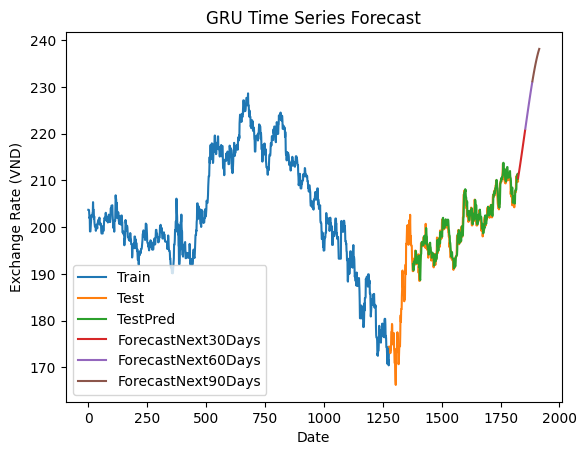

- Model accuracy evaluation: 
RMSE = 1.454667111288572
MAPE = 0.5559035487294082
MAE = 1.1138382594832954


In [55]:
implementGRU(train_eur_1_sc, test_eur_1_sc)

* Case 8:2

Epoch 1/100


C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.2052 - val_loss: 0.0177
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0152 - val_loss: 0.0029
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0057 - val_loss: 7.4131e-04
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0038 - val_loss: 6.1015e-04
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0022 - val_loss: 5.2762e-04
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0015 - val_loss: 4.9025e-04
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 9.3547e-04 - val_loss: 4.9240e-04
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 7.3225e-04 - val_loss: 4.9724e-04
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 6.9265e-04 - val_loss: 5.2401e-04
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 6.2028e-04 - val_loss: 5.3147e-04
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 7.0332e-04 - val_loss: 4.8920e-04
Epoch 12

Epoch 65/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 4.0585e-04 - val_loss: 3.0621e-04
Epoch 66/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 4.3151e-04 - val_loss: 2.9991e-04
Epoch 67/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 4.2579e-04 - val_loss: 3.0150e-04
Epoch 68/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 4.8317e-04 - val_loss: 2.9672e-04
Epoch 69/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 4.3145e-04 - val_loss: 2.9707e-04
Epoch 70/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 4.3564e-04 - val_loss: 2.9598e-04
Epoch 71/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 4.9111e-04 - val_loss: 2.9435e-04
Epoch 72/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 4.5685e-04 - val_loss: 3.2029e-04
Epoch 73/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 4.3525e-04 - val_loss: 3.4050e-04
Epoch 74/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 4.1377e-04 - val_loss: 3.1978e-04
Epoch 75/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/st

6 day output [[0.678734]]
7 day input [0.68142376 0.66920489 0.66920489 0.66920489 0.65078803 0.64087126
 0.62156897 0.61607933 0.60651673 0.60651673 0.60651673 0.60208961
 0.61572516 0.61962104 0.66495484 0.69045511 0.69045511 0.69045511
 0.69328847 0.70391358 0.70462192 0.69612183 0.70586152 0.70586152
 0.70586152 0.7156012  0.72321587 0.74340358 0.75934124 0.72534089
 0.72534089 0.72534089 0.72675757 0.73649726 0.70426775 0.7108199
 0.69488224 0.69488224 0.69488224 0.69116345 0.70019479 0.71471578
 0.7311847  0.74057021 0.74057021 0.74057021 0.72604923 0.71383035
 0.7012573  0.70798654 0.7072782  0.7072782  0.7072782  0.71737206
 0.71648663 0.72073667 0.72976802 0.70391358 0.70391358 0.70391358
 0.68691341 0.65344431 0.66477776 0.64582964 0.67115282 0.67115282
 0.67115282 0.62652736 0.61590225 0.63591287 0.6415796  0.63998583
 0.63998583 0.63998583 0.64140251 0.6367983  0.60917301 0.62705862
 0.66265274 0.66265274 0.66265274 0.66584027 0.6607048  0.66973614
 0.71524703 0.70940322 0.

14 day output [[0.6500742]]
15 day input [0.60651673 0.60651673 0.60651673 0.60208961 0.61572516 0.61962104
 0.66495484 0.69045511 0.69045511 0.69045511 0.69328847 0.70391358
 0.70462192 0.69612183 0.70586152 0.70586152 0.70586152 0.7156012
 0.72321587 0.74340358 0.75934124 0.72534089 0.72534089 0.72534089
 0.72675757 0.73649726 0.70426775 0.7108199  0.69488224 0.69488224
 0.69488224 0.69116345 0.70019479 0.71471578 0.7311847  0.74057021
 0.74057021 0.74057021 0.72604923 0.71383035 0.7012573  0.70798654
 0.7072782  0.7072782  0.7072782  0.71737206 0.71648663 0.72073667
 0.72976802 0.70391358 0.70391358 0.70391358 0.68691341 0.65344431
 0.66477776 0.64582964 0.67115282 0.67115282 0.67115282 0.62652736
 0.61590225 0.63591287 0.6415796  0.63998583 0.63998583 0.63998583
 0.64140251 0.6367983  0.60917301 0.62705862 0.66265274 0.66265274
 0.66265274 0.66584027 0.6607048  0.66973614 0.71524703 0.70940322
 0.70940322 0.70940322 0.71985125 0.7168408  0.69559058 0.71489286
 0.69966354 0.69896811

23 day output [[0.61698955]]
24 day input [0.69045511 0.69328847 0.70391358 0.70462192 0.69612183 0.70586152
 0.70586152 0.70586152 0.7156012  0.72321587 0.74340358 0.75934124
 0.72534089 0.72534089 0.72534089 0.72675757 0.73649726 0.70426775
 0.7108199  0.69488224 0.69488224 0.69488224 0.69116345 0.70019479
 0.71471578 0.7311847  0.74057021 0.74057021 0.74057021 0.72604923
 0.71383035 0.7012573  0.70798654 0.7072782  0.7072782  0.7072782
 0.71737206 0.71648663 0.72073667 0.72976802 0.70391358 0.70391358
 0.70391358 0.68691341 0.65344431 0.66477776 0.64582964 0.67115282
 0.67115282 0.67115282 0.62652736 0.61590225 0.63591287 0.6415796
 0.63998583 0.63998583 0.63998583 0.64140251 0.6367983  0.60917301
 0.62705862 0.66265274 0.66265274 0.66265274 0.66584027 0.6607048
 0.66973614 0.71524703 0.70940322 0.70940322 0.70940322 0.71985125
 0.7168408  0.69559058 0.71489286 0.69966354 0.69896811 0.69561005
 0.69230527 0.68897074 0.68560207 0.68218845 0.678734   0.67524272
 0.67171901 0.66816592 

31 day output [[0.58793944]]
32 day input [0.7156012  0.72321587 0.74340358 0.75934124 0.72534089 0.72534089
 0.72534089 0.72675757 0.73649726 0.70426775 0.7108199  0.69488224
 0.69488224 0.69488224 0.69116345 0.70019479 0.71471578 0.7311847
 0.74057021 0.74057021 0.74057021 0.72604923 0.71383035 0.7012573
 0.70798654 0.7072782  0.7072782  0.7072782  0.71737206 0.71648663
 0.72073667 0.72976802 0.70391358 0.70391358 0.70391358 0.68691341
 0.65344431 0.66477776 0.64582964 0.67115282 0.67115282 0.67115282
 0.62652736 0.61590225 0.63591287 0.6415796  0.63998583 0.63998583
 0.63998583 0.64140251 0.6367983  0.60917301 0.62705862 0.66265274
 0.66265274 0.66265274 0.66584027 0.6607048  0.66973614 0.71524703
 0.70940322 0.70940322 0.70940322 0.71985125 0.7168408  0.69559058
 0.71489286 0.69966354 0.69896811 0.69561005 0.69230527 0.68897074
 0.68560207 0.68218845 0.678734   0.67524272 0.67171901 0.66816592
 0.66458684 0.66098517 0.65736371 0.65372568 0.65007418 0.64641136
 0.64274049 0.6390636 

40 day output [[0.5563847]]
41 day input [0.70426775 0.7108199  0.69488224 0.69488224 0.69488224 0.69116345
 0.70019479 0.71471578 0.7311847  0.74057021 0.74057021 0.74057021
 0.72604923 0.71383035 0.7012573  0.70798654 0.7072782  0.7072782
 0.7072782  0.71737206 0.71648663 0.72073667 0.72976802 0.70391358
 0.70391358 0.70391358 0.68691341 0.65344431 0.66477776 0.64582964
 0.67115282 0.67115282 0.67115282 0.62652736 0.61590225 0.63591287
 0.6415796  0.63998583 0.63998583 0.63998583 0.64140251 0.6367983
 0.60917301 0.62705862 0.66265274 0.66265274 0.66265274 0.66584027
 0.6607048  0.66973614 0.71524703 0.70940322 0.70940322 0.70940322
 0.71985125 0.7168408  0.69559058 0.71489286 0.69966354 0.69896811
 0.69561005 0.69230527 0.68897074 0.68560207 0.68218845 0.678734
 0.67524272 0.67171901 0.66816592 0.66458684 0.66098517 0.65736371
 0.65372568 0.65007418 0.64641136 0.64274049 0.6390636  0.63538265
 0.63170034 0.62801808 0.62433833 0.62066185 0.61698955 0.61332363
 0.60966522 0.60601574 0.

48 day output [[0.5296365]]
49 day input [0.7311847  0.74057021 0.74057021 0.74057021 0.72604923 0.71383035
 0.7012573  0.70798654 0.7072782  0.7072782  0.7072782  0.71737206
 0.71648663 0.72073667 0.72976802 0.70391358 0.70391358 0.70391358
 0.68691341 0.65344431 0.66477776 0.64582964 0.67115282 0.67115282
 0.67115282 0.62652736 0.61590225 0.63591287 0.6415796  0.63998583
 0.63998583 0.63998583 0.64140251 0.6367983  0.60917301 0.62705862
 0.66265274 0.66265274 0.66265274 0.66584027 0.6607048  0.66973614
 0.71524703 0.70940322 0.70940322 0.70940322 0.71985125 0.7168408
 0.69559058 0.71489286 0.69966354 0.69896811 0.69561005 0.69230527
 0.68897074 0.68560207 0.68218845 0.678734   0.67524272 0.67171901
 0.66816592 0.66458684 0.66098517 0.65736371 0.65372568 0.65007418
 0.64641136 0.64274049 0.6390636  0.63538265 0.63170034 0.62801808
 0.62433833 0.62066185 0.61698955 0.61332363 0.60966522 0.60601574
 0.60237604 0.59874761 0.59513134 0.59152842 0.58793944 0.58436549
 0.58080745 0.57726568

56 day output [[0.5042063]]
57 day input [0.7072782  0.7072782  0.7072782  0.71737206 0.71648663 0.72073667
 0.72976802 0.70391358 0.70391358 0.70391358 0.68691341 0.65344431
 0.66477776 0.64582964 0.67115282 0.67115282 0.67115282 0.62652736
 0.61590225 0.63591287 0.6415796  0.63998583 0.63998583 0.63998583
 0.64140251 0.6367983  0.60917301 0.62705862 0.66265274 0.66265274
 0.66265274 0.66584027 0.6607048  0.66973614 0.71524703 0.70940322
 0.70940322 0.70940322 0.71985125 0.7168408  0.69559058 0.71489286
 0.69966354 0.69896811 0.69561005 0.69230527 0.68897074 0.68560207
 0.68218845 0.678734   0.67524272 0.67171901 0.66816592 0.66458684
 0.66098517 0.65736371 0.65372568 0.65007418 0.64641136 0.64274049
 0.6390636  0.63538265 0.63170034 0.62801808 0.62433833 0.62066185
 0.61698955 0.61332363 0.60966522 0.60601574 0.60237604 0.59874761
 0.59513134 0.59152842 0.58793944 0.58436549 0.58080745 0.57726568
 0.57374066 0.57023263 0.56674266 0.56327111 0.55981833 0.55638468
 0.55297011 0.5495755

66 day output [[0.47423542]]
67 day input [0.68691341 0.65344431 0.66477776 0.64582964 0.67115282 0.67115282
 0.67115282 0.62652736 0.61590225 0.63591287 0.6415796  0.63998583
 0.63998583 0.63998583 0.64140251 0.6367983  0.60917301 0.62705862
 0.66265274 0.66265274 0.66265274 0.66584027 0.6607048  0.66973614
 0.71524703 0.70940322 0.70940322 0.70940322 0.71985125 0.7168408
 0.69559058 0.71489286 0.69966354 0.69896811 0.69561005 0.69230527
 0.68897074 0.68560207 0.68218845 0.678734   0.67524272 0.67171901
 0.66816592 0.66458684 0.66098517 0.65736371 0.65372568 0.65007418
 0.64641136 0.64274049 0.6390636  0.63538265 0.63170034 0.62801808
 0.62433833 0.62066185 0.61698955 0.61332363 0.60966522 0.60601574
 0.60237604 0.59874761 0.59513134 0.59152842 0.58793944 0.58436549
 0.58080745 0.57726568 0.57374066 0.57023263 0.56674266 0.56327111
 0.55981833 0.55638468 0.55297011 0.54957551 0.54620105 0.54284686
 0.53951311 0.53620011 0.53290784 0.5296365  0.5263859  0.52315587
 0.51994652 0.5167576

77 day output [[0.44347757]]
78 day input [0.63998583 0.63998583 0.63998583 0.64140251 0.6367983  0.60917301
 0.62705862 0.66265274 0.66265274 0.66265274 0.66584027 0.6607048
 0.66973614 0.71524703 0.70940322 0.70940322 0.70940322 0.71985125
 0.7168408  0.69559058 0.71489286 0.69966354 0.69896811 0.69561005
 0.69230527 0.68897074 0.68560207 0.68218845 0.678734   0.67524272
 0.67171901 0.66816592 0.66458684 0.66098517 0.65736371 0.65372568
 0.65007418 0.64641136 0.64274049 0.6390636  0.63538265 0.63170034
 0.62801808 0.62433833 0.62066185 0.61698955 0.61332363 0.60966522
 0.60601574 0.60237604 0.59874761 0.59513134 0.59152842 0.58793944
 0.58436549 0.58080745 0.57726568 0.57374066 0.57023263 0.56674266
 0.56327111 0.55981833 0.55638468 0.55297011 0.54957551 0.54620105
 0.54284686 0.53951311 0.53620011 0.53290784 0.5296365  0.5263859
 0.52315587 0.51994652 0.51675761 0.51358908 0.51044101 0.50731337
 0.5042063  0.50111955 0.49805304 0.49500674 0.49198049 0.48897415
 0.48598763 0.48302051

86 day output [[0.4199475]]
87 day input [0.66265274 0.66584027 0.6607048  0.66973614 0.71524703 0.70940322
 0.70940322 0.70940322 0.71985125 0.7168408  0.69559058 0.71489286
 0.69966354 0.69896811 0.69561005 0.69230527 0.68897074 0.68560207
 0.68218845 0.678734   0.67524272 0.67171901 0.66816592 0.66458684
 0.66098517 0.65736371 0.65372568 0.65007418 0.64641136 0.64274049
 0.6390636  0.63538265 0.63170034 0.62801808 0.62433833 0.62066185
 0.61698955 0.61332363 0.60966522 0.60601574 0.60237604 0.59874761
 0.59513134 0.59152842 0.58793944 0.58436549 0.58080745 0.57726568
 0.57374066 0.57023263 0.56674266 0.56327111 0.55981833 0.55638468
 0.55297011 0.54957551 0.54620105 0.54284686 0.53951311 0.53620011
 0.53290784 0.5296365  0.5263859  0.52315587 0.51994652 0.51675761
 0.51358908 0.51044101 0.50731337 0.5042063  0.50111955 0.49805304
 0.49500674 0.49198049 0.48897415 0.48598763 0.48302051 0.48007277
 0.47714445 0.47423542 0.47134531 0.46847409 0.46562222 0.462789
 0.45997497 0.45717952 

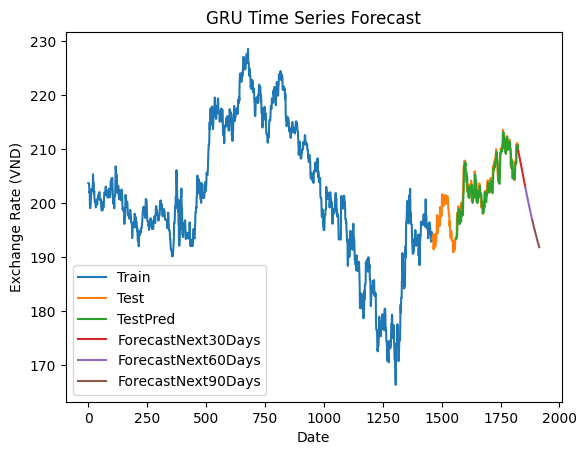

- Model accuracy evaluation: 
RMSE = 1.5028843887301266
MAPE = 0.555589998117997
MAE = 1.135296542162357


In [56]:
implementGRU(train_eur_2_sc, test_eur_2_sc)

* Case 9:1

Epoch 1/100


C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0577 - val_loss: 0.0050
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0043 - val_loss: 5.1241e-04
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0017 - val_loss: 4.1044e-04
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0011 - val_loss: 3.9980e-04
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 6.9057e-04 - val_loss: 4.0833e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 6.0007e-04 - val_loss: 4.1565e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 5.6308e-04 - val_loss: 3.6303e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 5.7937e-04 - val_loss: 3.5087e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 5.7394e-04 - val_loss: 3.3818e-04
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 5.7931e-04 - val_loss: 3.6095e-04
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 5.4046e-04 - val_loss: 3.2408e

Epoch 65/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 3.9047e-04 - val_loss: 2.4653e-04
Epoch 66/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 3.8893e-04 - val_loss: 3.3967e-04
Epoch 67/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 3.8439e-04 - val_loss: 4.1727e-04
Epoch 68/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 5.6247e-04 - val_loss: 2.6919e-04
Epoch 69/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 3.8121e-04 - val_loss: 2.4682e-04
Epoch 70/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 3.7237e-04 - val_loss: 2.5694e-04
Epoch 71/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 3.7156e-04 - val_loss: 2.4615e-04
Epoch 72/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 4.1545e-04 - val_loss: 2.4788e-04
Epoch 73/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 3.6841e-04 - val_loss: 2.5160e-04
Epoch 74/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 3.6970e-04 - val_loss: 2.5717e-04
Epoch 75/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/st

4 day output [[0.7060448]]
5 day input [0.68284045 0.70161148 0.68142376 0.66920489 0.66920489 0.66920489
 0.65078803 0.64087126 0.62156897 0.61607933 0.60651673 0.60651673
 0.60651673 0.60208961 0.61572516 0.61962104 0.66495484 0.69045511
 0.69045511 0.69045511 0.69328847 0.70391358 0.70462192 0.69612183
 0.70586152 0.70586152 0.70586152 0.7156012  0.72321587 0.74340358
 0.75934124 0.72534089 0.72534089 0.72534089 0.72675757 0.73649726
 0.70426775 0.7108199  0.69488224 0.69488224 0.69488224 0.69116345
 0.70019479 0.71471578 0.7311847  0.74057021 0.74057021 0.74057021
 0.72604923 0.71383035 0.7012573  0.70798654 0.7072782  0.7072782
 0.7072782  0.71737206 0.71648663 0.72073667 0.72976802 0.70391358
 0.70391358 0.70391358 0.68691341 0.65344431 0.66477776 0.64582964
 0.67115282 0.67115282 0.67115282 0.62652736 0.61590225 0.63591287
 0.6415796  0.63998583 0.63998583 0.63998583 0.64140251 0.6367983
 0.60917301 0.62705862 0.66265274 0.66265274 0.66265274 0.66584027
 0.6607048  0.66973614 0.

14 day output [[0.7154527]]
15 day input [0.60651673 0.60651673 0.60651673 0.60208961 0.61572516 0.61962104
 0.66495484 0.69045511 0.69045511 0.69045511 0.69328847 0.70391358
 0.70462192 0.69612183 0.70586152 0.70586152 0.70586152 0.7156012
 0.72321587 0.74340358 0.75934124 0.72534089 0.72534089 0.72534089
 0.72675757 0.73649726 0.70426775 0.7108199  0.69488224 0.69488224
 0.69488224 0.69116345 0.70019479 0.71471578 0.7311847  0.74057021
 0.74057021 0.74057021 0.72604923 0.71383035 0.7012573  0.70798654
 0.7072782  0.7072782  0.7072782  0.71737206 0.71648663 0.72073667
 0.72976802 0.70391358 0.70391358 0.70391358 0.68691341 0.65344431
 0.66477776 0.64582964 0.67115282 0.67115282 0.67115282 0.62652736
 0.61590225 0.63591287 0.6415796  0.63998583 0.63998583 0.63998583
 0.64140251 0.6367983  0.60917301 0.62705862 0.66265274 0.66265274
 0.66265274 0.66584027 0.6607048  0.66973614 0.71524703 0.70940322
 0.70940322 0.70940322 0.71985125 0.7168408  0.69559058 0.71489286
 0.69966354 0.70212674

24 day output [[0.7242656]]
25 day input [0.69328847 0.70391358 0.70462192 0.69612183 0.70586152 0.70586152
 0.70586152 0.7156012  0.72321587 0.74340358 0.75934124 0.72534089
 0.72534089 0.72534089 0.72675757 0.73649726 0.70426775 0.7108199
 0.69488224 0.69488224 0.69488224 0.69116345 0.70019479 0.71471578
 0.7311847  0.74057021 0.74057021 0.74057021 0.72604923 0.71383035
 0.7012573  0.70798654 0.7072782  0.7072782  0.7072782  0.71737206
 0.71648663 0.72073667 0.72976802 0.70391358 0.70391358 0.70391358
 0.68691341 0.65344431 0.66477776 0.64582964 0.67115282 0.67115282
 0.67115282 0.62652736 0.61590225 0.63591287 0.6415796  0.63998583
 0.63998583 0.63998583 0.64140251 0.6367983  0.60917301 0.62705862
 0.66265274 0.66265274 0.66265274 0.66584027 0.6607048  0.66973614
 0.71524703 0.70940322 0.70940322 0.70940322 0.71985125 0.7168408
 0.69559058 0.71489286 0.69966354 0.70212674 0.70306486 0.70406693
 0.70506459 0.70604479 0.70701784 0.70798391 0.70894212 0.70989287
 0.71083659 0.71177334 

32 day output [[0.7309912]]
33 day input [0.72321587 0.74340358 0.75934124 0.72534089 0.72534089 0.72534089
 0.72675757 0.73649726 0.70426775 0.7108199  0.69488224 0.69488224
 0.69488224 0.69116345 0.70019479 0.71471578 0.7311847  0.74057021
 0.74057021 0.74057021 0.72604923 0.71383035 0.7012573  0.70798654
 0.7072782  0.7072782  0.7072782  0.71737206 0.71648663 0.72073667
 0.72976802 0.70391358 0.70391358 0.70391358 0.68691341 0.65344431
 0.66477776 0.64582964 0.67115282 0.67115282 0.67115282 0.62652736
 0.61590225 0.63591287 0.6415796  0.63998583 0.63998583 0.63998583
 0.64140251 0.6367983  0.60917301 0.62705862 0.66265274 0.66265274
 0.66265274 0.66584027 0.6607048  0.66973614 0.71524703 0.70940322
 0.70940322 0.70940322 0.71985125 0.7168408  0.69559058 0.71489286
 0.69966354 0.70212674 0.70306486 0.70406693 0.70506459 0.70604479
 0.70701784 0.70798391 0.70894212 0.70989287 0.71083659 0.71177334
 0.71270311 0.71362597 0.71454245 0.71545267 0.71635693 0.71725559
 0.71814871 0.7190365

41 day output [[0.7382708]]
42 day input [0.7108199  0.69488224 0.69488224 0.69488224 0.69116345 0.70019479
 0.71471578 0.7311847  0.74057021 0.74057021 0.74057021 0.72604923
 0.71383035 0.7012573  0.70798654 0.7072782  0.7072782  0.7072782
 0.71737206 0.71648663 0.72073667 0.72976802 0.70391358 0.70391358
 0.70391358 0.68691341 0.65344431 0.66477776 0.64582964 0.67115282
 0.67115282 0.67115282 0.62652736 0.61590225 0.63591287 0.6415796
 0.63998583 0.63998583 0.63998583 0.64140251 0.6367983  0.60917301
 0.62705862 0.66265274 0.66265274 0.66265274 0.66584027 0.6607048
 0.66973614 0.71524703 0.70940322 0.70940322 0.70940322 0.71985125
 0.7168408  0.69559058 0.71489286 0.69966354 0.70212674 0.70306486
 0.70406693 0.70506459 0.70604479 0.70701784 0.70798391 0.70894212
 0.70989287 0.71083659 0.71177334 0.71270311 0.71362597 0.71454245
 0.71545267 0.71635693 0.71725559 0.71814871 0.71903652 0.71991974
 0.72079802 0.721672   0.72254145 0.72340578 0.72426558 0.72512096
 0.72597212 0.72681874 0

50 day output [[0.74528843]]
51 day input [0.74057021 0.74057021 0.72604923 0.71383035 0.7012573  0.70798654
 0.7072782  0.7072782  0.7072782  0.71737206 0.71648663 0.72073667
 0.72976802 0.70391358 0.70391358 0.70391358 0.68691341 0.65344431
 0.66477776 0.64582964 0.67115282 0.67115282 0.67115282 0.62652736
 0.61590225 0.63591287 0.6415796  0.63998583 0.63998583 0.63998583
 0.64140251 0.6367983  0.60917301 0.62705862 0.66265274 0.66265274
 0.66265274 0.66584027 0.6607048  0.66973614 0.71524703 0.70940322
 0.70940322 0.70940322 0.71985125 0.7168408  0.69559058 0.71489286
 0.69966354 0.70212674 0.70306486 0.70406693 0.70506459 0.70604479
 0.70701784 0.70798391 0.70894212 0.70989287 0.71083659 0.71177334
 0.71270311 0.71362597 0.71454245 0.71545267 0.71635693 0.71725559
 0.71814871 0.71903652 0.71991974 0.72079802 0.721672   0.72254145
 0.72340578 0.72426558 0.72512096 0.72597212 0.72681874 0.72766119
 0.72849953 0.72933382 0.73016429 0.73099118 0.73181427 0.73263395
 0.73344994 0.734261

60 day output [[0.75281227]]
61 day input [0.71648663 0.72073667 0.72976802 0.70391358 0.70391358 0.70391358
 0.68691341 0.65344431 0.66477776 0.64582964 0.67115282 0.67115282
 0.67115282 0.62652736 0.61590225 0.63591287 0.6415796  0.63998583
 0.63998583 0.63998583 0.64140251 0.6367983  0.60917301 0.62705862
 0.66265274 0.66265274 0.66265274 0.66584027 0.6607048  0.66973614
 0.71524703 0.70940322 0.70940322 0.70940322 0.71985125 0.7168408
 0.69559058 0.71489286 0.69966354 0.70212674 0.70306486 0.70406693
 0.70506459 0.70604479 0.70701784 0.70798391 0.70894212 0.70989287
 0.71083659 0.71177334 0.71270311 0.71362597 0.71454245 0.71545267
 0.71635693 0.71725559 0.71814871 0.71903652 0.71991974 0.72079802
 0.721672   0.72254145 0.72340578 0.72426558 0.72512096 0.72597212
 0.72681874 0.72766119 0.72849953 0.72933382 0.73016429 0.73099118
 0.73181427 0.73263395 0.73344994 0.73426187 0.73507047 0.73587561
 0.73667753 0.73747599 0.73827082 0.73906261 0.73985112 0.74063671
 0.74141896 0.7421982

70 day output [[0.7600593]]
71 day input [0.67115282 0.67115282 0.67115282 0.62652736 0.61590225 0.63591287
 0.6415796  0.63998583 0.63998583 0.63998583 0.64140251 0.6367983
 0.60917301 0.62705862 0.66265274 0.66265274 0.66265274 0.66584027
 0.6607048  0.66973614 0.71524703 0.70940322 0.70940322 0.70940322
 0.71985125 0.7168408  0.69559058 0.71489286 0.69966354 0.70212674
 0.70306486 0.70406693 0.70506459 0.70604479 0.70701784 0.70798391
 0.70894212 0.70989287 0.71083659 0.71177334 0.71270311 0.71362597
 0.71454245 0.71545267 0.71635693 0.71725559 0.71814871 0.71903652
 0.71991974 0.72079802 0.721672   0.72254145 0.72340578 0.72426558
 0.72512096 0.72597212 0.72681874 0.72766119 0.72849953 0.72933382
 0.73016429 0.73099118 0.73181427 0.73263395 0.73344994 0.73426187
 0.73507047 0.73587561 0.73667753 0.73747599 0.73827082 0.73906261
 0.73985112 0.74063671 0.74141896 0.74219823 0.74297488 0.74374878
 0.74452001 0.74528843 0.74605381 0.74681622 0.7475757  0.74833196
 0.74908543 0.74983621

79 day output [[0.76635146]]
80 day input [0.63998583 0.64140251 0.6367983  0.60917301 0.62705862 0.66265274
 0.66265274 0.66265274 0.66584027 0.6607048  0.66973614 0.71524703
 0.70940322 0.70940322 0.70940322 0.71985125 0.7168408  0.69559058
 0.71489286 0.69966354 0.70212674 0.70306486 0.70406693 0.70506459
 0.70604479 0.70701784 0.70798391 0.70894212 0.70989287 0.71083659
 0.71177334 0.71270311 0.71362597 0.71454245 0.71545267 0.71635693
 0.71725559 0.71814871 0.71903652 0.71991974 0.72079802 0.721672
 0.72254145 0.72340578 0.72426558 0.72512096 0.72597212 0.72681874
 0.72766119 0.72849953 0.72933382 0.73016429 0.73099118 0.73181427
 0.73263395 0.73344994 0.73426187 0.73507047 0.73587561 0.73667753
 0.73747599 0.73827082 0.73906261 0.73985112 0.74063671 0.74141896
 0.74219823 0.74297488 0.74374878 0.74452001 0.74528843 0.74605381
 0.74681622 0.7475757  0.74833196 0.74908543 0.74983621 0.75058419
 0.7513296  0.75207222 0.75281227 0.75354958 0.75428414 0.75501609
 0.75574499 0.75647122

87 day output [[0.771764]]
88 day input [0.66584027 0.6607048  0.66973614 0.71524703 0.70940322 0.70940322
 0.70940322 0.71985125 0.7168408  0.69559058 0.71489286 0.69966354
 0.70212674 0.70306486 0.70406693 0.70506459 0.70604479 0.70701784
 0.70798391 0.70894212 0.70989287 0.71083659 0.71177334 0.71270311
 0.71362597 0.71454245 0.71545267 0.71635693 0.71725559 0.71814871
 0.71903652 0.71991974 0.72079802 0.721672   0.72254145 0.72340578
 0.72426558 0.72512096 0.72597212 0.72681874 0.72766119 0.72849953
 0.72933382 0.73016429 0.73099118 0.73181427 0.73263395 0.73344994
 0.73426187 0.73507047 0.73587561 0.73667753 0.73747599 0.73827082
 0.73906261 0.73985112 0.74063671 0.74141896 0.74219823 0.74297488
 0.74374878 0.74452001 0.74528843 0.74605381 0.74681622 0.7475757
 0.74833196 0.74908543 0.74983621 0.75058419 0.7513296  0.75207222
 0.75281227 0.75354958 0.75428414 0.75501609 0.75574499 0.75647122
 0.75719464 0.75791484 0.75863218 0.75934708 0.7600593  0.76076937
 0.76147664 0.76218116 

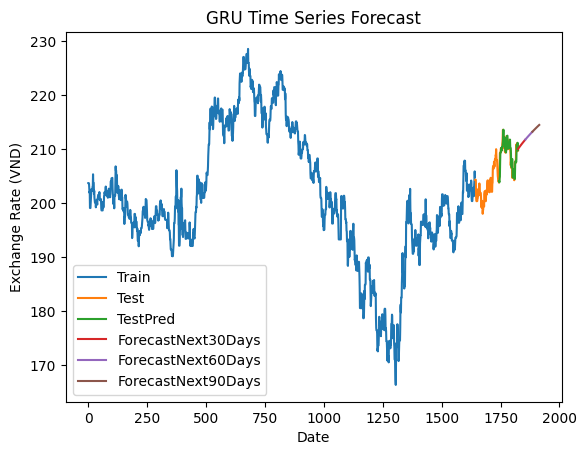

- Model accuracy evaluation: 
RMSE = 1.3790383839784914
MAPE = 0.4638820220761576
MAE = 0.9698934928654368


In [57]:
implementGRU(train_eur_3_sc, test_eur_3_sc)

**JPY_VND**

* Case 7:3

Epoch 1/100


C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 0.2240 - val_loss: 0.0592
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0165 - val_loss: 0.0180
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0047 - val_loss: 0.0221
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0032 - val_loss: 0.0150
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0023 - val_loss: 0.0104
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0016 - val_loss: 0.0072
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0013 - val_loss: 0.0042
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 8.8918e-04 - val_loss: 0.0025
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 6.2511e-04 - val_loss: 0.0014
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 5.3699e-04 - val_loss: 8.4054e-04
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 4.5652e-04 - val_loss: 5.3804e-04
Epoch 12/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 3.2638e-04 - val_loss: 3.1995e-04
Epoch 66/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 2.5136e-04 - val_loss: 3.2227e-04
Epoch 67/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 3.2017e-04 - val_loss: 3.1642e-04
Epoch 68/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 2.9658e-04 - val_loss: 3.1629e-04
Epoch 69/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 3.1350e-04 - val_loss: 3.2197e-04
Epoch 70/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 2.5361e-04 - val_loss: 3.1284e-04
Epoch 71/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 3.0189e-04 - val_loss: 3.1356e-04
Epoch 72/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 2.8892e-04 - val_loss: 3.1185e-04
Epoch 73/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 2.6030e-04 - val_loss: 3.1069e-04
Epoch 74/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 2.6732e-04 - val_loss: 3.1015e-04
Epoch 75/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 3.

6 day output [[0.04349391]]
7 day input [0.06898765 0.0612867  0.0612867  0.0612867  0.07684903 0.07091288
 0.06866677 0.10717151 0.12000642 0.12000642 0.12000642 0.08471041
 0.10075405 0.09337398 0.17182737 0.17054388 0.17054388 0.17054388
 0.16877908 0.13043478 0.14631798 0.15129151 0.15963421 0.15963421
 0.15963421 0.15754853 0.16348468 0.16300337 0.18626665 0.17006257
 0.17006257 0.17006257 0.18305792 0.18145355 0.16781646 0.14310926
 0.11856249 0.11856249 0.11856249 0.12754693 0.1384566  0.12642387
 0.12145034 0.13396438 0.13396438 0.13396438 0.12112947 0.11070111
 0.08406867 0.08535216 0.08390823 0.08390823 0.08390823 0.08214343
 0.09112787 0.09898925 0.09754532 0.09401572 0.09401572 0.09401572
 0.08615434 0.07781165 0.08118081 0.08968394 0.08454998 0.08454998
 0.08454998 0.05647361 0.0524627  0.07059201 0.05888015 0.04684742
 0.04684742 0.04684742 0.0506979  0.04251564 0.02583026 0.03818386
 0.0454035  0.0454035  0.0454035  0.04957484 0.04219477 0.04524306
 0.05053746 0.04989572

16 day output [[0.03364426]]
17 day input [0.12000642 0.08471041 0.10075405 0.09337398 0.17182737 0.17054388
 0.17054388 0.17054388 0.16877908 0.13043478 0.14631798 0.15129151
 0.15963421 0.15963421 0.15963421 0.15754853 0.16348468 0.16300337
 0.18626665 0.17006257 0.17006257 0.17006257 0.18305792 0.18145355
 0.16781646 0.14310926 0.11856249 0.11856249 0.11856249 0.12754693
 0.1384566  0.12642387 0.12145034 0.13396438 0.13396438 0.13396438
 0.12112947 0.11070111 0.08406867 0.08535216 0.08390823 0.08390823
 0.08390823 0.08214343 0.09112787 0.09898925 0.09754532 0.09401572
 0.09401572 0.09401572 0.08615434 0.07781165 0.08118081 0.08968394
 0.08454998 0.08454998 0.08454998 0.05647361 0.0524627  0.07059201
 0.05888015 0.04684742 0.04684742 0.04684742 0.0506979  0.04251564
 0.02583026 0.03818386 0.0454035  0.0454035  0.0454035  0.04957484
 0.04219477 0.04524306 0.05053746 0.04989572 0.04989572 0.04989572
 0.05519012 0.05310444 0.04412001 0.06369325 0.04700786 0.04970339
 0.04866405 0.047608

26 day output [[0.02434704]]
27 day input [0.14631798 0.15129151 0.15963421 0.15963421 0.15963421 0.15754853
 0.16348468 0.16300337 0.18626665 0.17006257 0.17006257 0.17006257
 0.18305792 0.18145355 0.16781646 0.14310926 0.11856249 0.11856249
 0.11856249 0.12754693 0.1384566  0.12642387 0.12145034 0.13396438
 0.13396438 0.13396438 0.12112947 0.11070111 0.08406867 0.08535216
 0.08390823 0.08390823 0.08390823 0.08214343 0.09112787 0.09898925
 0.09754532 0.09401572 0.09401572 0.09401572 0.08615434 0.07781165
 0.08118081 0.08968394 0.08454998 0.08454998 0.08454998 0.05647361
 0.0524627  0.07059201 0.05888015 0.04684742 0.04684742 0.04684742
 0.0506979  0.04251564 0.02583026 0.03818386 0.0454035  0.0454035
 0.0454035  0.04957484 0.04219477 0.04524306 0.05053746 0.04989572
 0.04989572 0.04989572 0.05519012 0.05310444 0.04412001 0.06369325
 0.04700786 0.04970339 0.04866405 0.04760836 0.0465647  0.04553293
 0.04450994 0.04349391 0.04248399 0.0414798  0.04048121 0.03948809
 0.03850044 0.0375182

37 day output [[0.01475649]]
38 day input [0.17006257 0.18305792 0.18145355 0.16781646 0.14310926 0.11856249
 0.11856249 0.11856249 0.12754693 0.1384566  0.12642387 0.12145034
 0.13396438 0.13396438 0.13396438 0.12112947 0.11070111 0.08406867
 0.08535216 0.08390823 0.08390823 0.08390823 0.08214343 0.09112787
 0.09898925 0.09754532 0.09401572 0.09401572 0.09401572 0.08615434
 0.07781165 0.08118081 0.08968394 0.08454998 0.08454998 0.08454998
 0.05647361 0.0524627  0.07059201 0.05888015 0.04684742 0.04684742
 0.04684742 0.0506979  0.04251564 0.02583026 0.03818386 0.0454035
 0.0454035  0.0454035  0.04957484 0.04219477 0.04524306 0.05053746
 0.04989572 0.04989572 0.04989572 0.05519012 0.05310444 0.04412001
 0.06369325 0.04700786 0.04970339 0.04866405 0.04760836 0.0465647
 0.04553293 0.04450994 0.04349391 0.04248399 0.0414798  0.04048121
 0.03948809 0.03850044 0.03751824 0.03654151 0.03557026 0.03460451
 0.03364426 0.03268955 0.03174039 0.03079678 0.02985872 0.02892623
 0.02799929 0.02707791

45 day output [[0.00819032]]
46 day input [0.12754693 0.1384566  0.12642387 0.12145034 0.13396438 0.13396438
 0.13396438 0.12112947 0.11070111 0.08406867 0.08535216 0.08390823
 0.08390823 0.08390823 0.08214343 0.09112787 0.09898925 0.09754532
 0.09401572 0.09401572 0.09401572 0.08615434 0.07781165 0.08118081
 0.08968394 0.08454998 0.08454998 0.08454998 0.05647361 0.0524627
 0.07059201 0.05888015 0.04684742 0.04684742 0.04684742 0.0506979
 0.04251564 0.02583026 0.03818386 0.0454035  0.0454035  0.0454035
 0.04957484 0.04219477 0.04524306 0.05053746 0.04989572 0.04989572
 0.04989572 0.05519012 0.05310444 0.04412001 0.06369325 0.04700786
 0.04970339 0.04866405 0.04760836 0.0465647  0.04553293 0.04450994
 0.04349391 0.04248399 0.0414798  0.04048121 0.03948809 0.03850044
 0.03751824 0.03654151 0.03557026 0.03460451 0.03364426 0.03268955
 0.03174039 0.03079678 0.02985872 0.02892623 0.02799929 0.02707791
 0.02616208 0.02525179 0.02434704 0.02344781 0.02255409 0.02166587
 0.02078315 0.0199059  

56 day output [[-0.00029481]]
57 day input [ 0.08390823  0.08390823  0.08390823  0.08214343  0.09112787  0.09898925
  0.09754532  0.09401572  0.09401572  0.09401572  0.08615434  0.07781165
  0.08118081  0.08968394  0.08454998  0.08454998  0.08454998  0.05647361
  0.0524627   0.07059201  0.05888015  0.04684742  0.04684742  0.04684742
  0.0506979   0.04251564  0.02583026  0.03818386  0.0454035   0.0454035
  0.0454035   0.04957484  0.04219477  0.04524306  0.05053746  0.04989572
  0.04989572  0.04989572  0.05519012  0.05310444  0.04412001  0.06369325
  0.04700786  0.04970339  0.04866405  0.04760836  0.0465647   0.04553293
  0.04450994  0.04349391  0.04248399  0.0414798   0.04048121  0.03948809
  0.03850044  0.03751824  0.03654151  0.03557026  0.03460451  0.03364426
  0.03268955  0.03174039  0.03079678  0.02985872  0.02892623  0.02799929
  0.02707791  0.02616208  0.02525179  0.02434704  0.02344781  0.02255409
  0.02166587  0.02078315  0.0199059   0.0190341   0.01816775  0.01730684
  0.01645

66 day output [[-0.00748278]]
67 day input [ 0.08615434  0.07781165  0.08118081  0.08968394  0.08454998  0.08454998
  0.08454998  0.05647361  0.0524627   0.07059201  0.05888015  0.04684742
  0.04684742  0.04684742  0.0506979   0.04251564  0.02583026  0.03818386
  0.0454035   0.0454035   0.0454035   0.04957484  0.04219477  0.04524306
  0.05053746  0.04989572  0.04989572  0.04989572  0.05519012  0.05310444
  0.04412001  0.06369325  0.04700786  0.04970339  0.04866405  0.04760836
  0.0465647   0.04553293  0.04450994  0.04349391  0.04248399  0.0414798
  0.04048121  0.03948809  0.03850044  0.03751824  0.03654151  0.03557026
  0.03460451  0.03364426  0.03268955  0.03174039  0.03079678  0.02985872
  0.02892623  0.02799929  0.02707791  0.02616208  0.02525179  0.02434704
  0.02344781  0.02255409  0.02166587  0.02078315  0.0199059   0.0190341
  0.01816775  0.01730684  0.01645133  0.01560122  0.01475649  0.01391713
  0.01308312  0.01225443  0.01143106  0.01061297  0.00980017  0.00899262
  0.008190

73 day output [[-0.01222817]]
74 day input [ 0.05647361  0.0524627   0.07059201  0.05888015  0.04684742  0.04684742
  0.04684742  0.0506979   0.04251564  0.02583026  0.03818386  0.0454035
  0.0454035   0.0454035   0.04957484  0.04219477  0.04524306  0.05053746
  0.04989572  0.04989572  0.04989572  0.05519012  0.05310444  0.04412001
  0.06369325  0.04700786  0.04970339  0.04866405  0.04760836  0.0465647
  0.04553293  0.04450994  0.04349391  0.04248399  0.0414798   0.04048121
  0.03948809  0.03850044  0.03751824  0.03654151  0.03557026  0.03460451
  0.03364426  0.03268955  0.03174039  0.03079678  0.02985872  0.02892623
  0.02799929  0.02707791  0.02616208  0.02525179  0.02434704  0.02344781
  0.02255409  0.02166587  0.02078315  0.0199059   0.0190341   0.01816775
  0.01730684  0.01645133  0.01560122  0.01475649  0.01391713  0.01308312
  0.01225443  0.01143106  0.01061297  0.00980017  0.00899262  0.00819032
  0.00739323  0.00660134  0.00581464  0.00503309  0.00425669  0.00348542
  0.002719

83 day output [[-0.01861536]]
84 day input [ 0.03818386  0.0454035   0.0454035   0.0454035   0.04957484  0.04219477
  0.04524306  0.05053746  0.04989572  0.04989572  0.04989572  0.05519012
  0.05310444  0.04412001  0.06369325  0.04700786  0.04970339  0.04866405
  0.04760836  0.0465647   0.04553293  0.04450994  0.04349391  0.04248399
  0.0414798   0.04048121  0.03948809  0.03850044  0.03751824  0.03654151
  0.03557026  0.03460451  0.03364426  0.03268955  0.03174039  0.03079678
  0.02985872  0.02892623  0.02799929  0.02707791  0.02616208  0.02525179
  0.02434704  0.02344781  0.02255409  0.02166587  0.02078315  0.0199059
  0.0190341   0.01816775  0.01730684  0.01645133  0.01560122  0.01475649
  0.01391713  0.01308312  0.01225443  0.01143106  0.01061297  0.00980017
  0.00899262  0.00819032  0.00739323  0.00660134  0.00581464  0.00503309
  0.00425669  0.00348542  0.00271925  0.00195816  0.00120213  0.00045115
 -0.00029481 -0.00103577 -0.00177175 -0.00250277 -0.00322884 -0.00395001
 -0.00466

90 day output [[-0.02282281]]


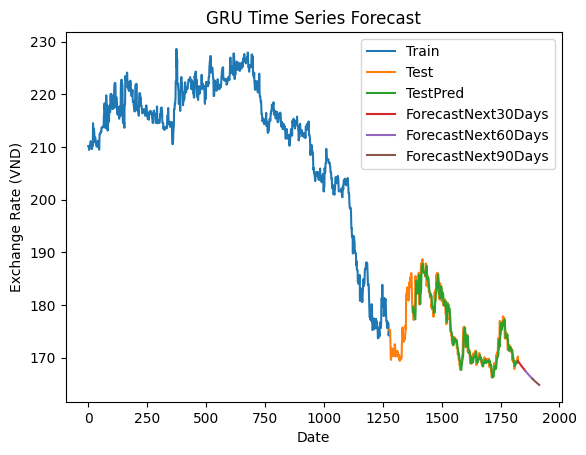

- Model accuracy evaluation: 
RMSE = 1.4084484753586177
MAPE = 0.5493986108828883
MAE = 0.9710333811783415


In [58]:
implementGRU(train_jpy_1_sc, test_jpy_1_sc)

* Case 8:2

Epoch 1/100


C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.4477 - val_loss: 0.1022
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0285 - val_loss: 0.0430
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0126 - val_loss: 0.0428
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0071 - val_loss: 0.0231
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0039 - val_loss: 0.0116
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0022 - val_loss: 0.0045
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0011 - val_loss: 0.0015
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 6.8771e-04 - val_loss: 6.6067e-04
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 6.6171e-04 - val_loss: 5.3744e-04
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 6.0693e-04 - val_loss: 4.9728e-04
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 6.2384e-04 - val_loss: 4.8348e-04
Epoch 12/100
22/22 ━━━━━━━━━━━━━

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 4.4519e-04 - val_loss: 2.6083e-04
Epoch 66/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 4.1754e-04 - val_loss: 2.5210e-04
Epoch 67/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 3.5736e-04 - val_loss: 2.5530e-04
Epoch 68/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 3.9339e-04 - val_loss: 2.4340e-04
Epoch 69/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 3.8869e-04 - val_loss: 2.4040e-04
Epoch 70/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 4.0293e-04 - val_loss: 2.5826e-04
Epoch 71/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 3.7584e-04 - val_loss: 2.4617e-04
Epoch 72/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 3.8578e-04 - val_loss: 2.5135e-04
Epoch 73/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 3.9438e-04 - val_loss: 2.4578e-04
Epoch 74/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 4.1827e-04 - val_loss: 2.3906e-04
Epoch 75/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 3.

4 day output [[0.06026896]]
5 day input [0.04139259 0.06160757 0.06898765 0.0612867  0.0612867  0.0612867
 0.07684903 0.07091288 0.06866677 0.10717151 0.12000642 0.12000642
 0.12000642 0.08471041 0.10075405 0.09337398 0.17182737 0.17054388
 0.17054388 0.17054388 0.16877908 0.13043478 0.14631798 0.15129151
 0.15963421 0.15963421 0.15963421 0.15754853 0.16348468 0.16300337
 0.18626665 0.17006257 0.17006257 0.17006257 0.18305792 0.18145355
 0.16781646 0.14310926 0.11856249 0.11856249 0.11856249 0.12754693
 0.1384566  0.12642387 0.12145034 0.13396438 0.13396438 0.13396438
 0.12112947 0.11070111 0.08406867 0.08535216 0.08390823 0.08390823
 0.08390823 0.08214343 0.09112787 0.09898925 0.09754532 0.09401572
 0.09401572 0.09401572 0.08615434 0.07781165 0.08118081 0.08968394
 0.08454998 0.08454998 0.08454998 0.05647361 0.0524627  0.07059201
 0.05888015 0.04684742 0.04684742 0.04684742 0.0506979  0.04251564
 0.02583026 0.03818386 0.0454035  0.0454035  0.0454035  0.04957484
 0.04219477 0.04524306 

14 day output [[0.07247721]]
15 day input [0.12000642 0.12000642 0.12000642 0.08471041 0.10075405 0.09337398
 0.17182737 0.17054388 0.17054388 0.17054388 0.16877908 0.13043478
 0.14631798 0.15129151 0.15963421 0.15963421 0.15963421 0.15754853
 0.16348468 0.16300337 0.18626665 0.17006257 0.17006257 0.17006257
 0.18305792 0.18145355 0.16781646 0.14310926 0.11856249 0.11856249
 0.11856249 0.12754693 0.1384566  0.12642387 0.12145034 0.13396438
 0.13396438 0.13396438 0.12112947 0.11070111 0.08406867 0.08535216
 0.08390823 0.08390823 0.08390823 0.08214343 0.09112787 0.09898925
 0.09754532 0.09401572 0.09401572 0.09401572 0.08615434 0.07781165
 0.08118081 0.08968394 0.08454998 0.08454998 0.08454998 0.05647361
 0.0524627  0.07059201 0.05888015 0.04684742 0.04684742 0.04684742
 0.0506979  0.04251564 0.02583026 0.03818386 0.0454035  0.0454035
 0.0454035  0.04957484 0.04219477 0.04524306 0.05053746 0.04989572
 0.04989572 0.04989572 0.05519012 0.05310444 0.04412001 0.06369325
 0.04700786 0.0555932

25 day output [[0.08354573]]
26 day input [0.13043478 0.14631798 0.15129151 0.15963421 0.15963421 0.15963421
 0.15754853 0.16348468 0.16300337 0.18626665 0.17006257 0.17006257
 0.17006257 0.18305792 0.18145355 0.16781646 0.14310926 0.11856249
 0.11856249 0.11856249 0.12754693 0.1384566  0.12642387 0.12145034
 0.13396438 0.13396438 0.13396438 0.12112947 0.11070111 0.08406867
 0.08535216 0.08390823 0.08390823 0.08390823 0.08214343 0.09112787
 0.09898925 0.09754532 0.09401572 0.09401572 0.09401572 0.08615434
 0.07781165 0.08118081 0.08968394 0.08454998 0.08454998 0.08454998
 0.05647361 0.0524627  0.07059201 0.05888015 0.04684742 0.04684742
 0.04684742 0.0506979  0.04251564 0.02583026 0.03818386 0.0454035
 0.0454035  0.0454035  0.04957484 0.04219477 0.04524306 0.05053746
 0.04989572 0.04989572 0.04989572 0.05519012 0.05310444 0.04412001
 0.06369325 0.04700786 0.05559327 0.05630871 0.05757014 0.05891769
 0.06026896 0.06160106 0.0629077  0.06418788 0.06544219 0.06667162
 0.06787715 0.0690597

33 day output [[0.09036788]]
34 day input [0.16300337 0.18626665 0.17006257 0.17006257 0.17006257 0.18305792
 0.18145355 0.16781646 0.14310926 0.11856249 0.11856249 0.11856249
 0.12754693 0.1384566  0.12642387 0.12145034 0.13396438 0.13396438
 0.13396438 0.12112947 0.11070111 0.08406867 0.08535216 0.08390823
 0.08390823 0.08390823 0.08214343 0.09112787 0.09898925 0.09754532
 0.09401572 0.09401572 0.09401572 0.08615434 0.07781165 0.08118081
 0.08968394 0.08454998 0.08454998 0.08454998 0.05647361 0.0524627
 0.07059201 0.05888015 0.04684742 0.04684742 0.04684742 0.0506979
 0.04251564 0.02583026 0.03818386 0.0454035  0.0454035  0.0454035
 0.04957484 0.04219477 0.04524306 0.05053746 0.04989572 0.04989572
 0.04989572 0.05519012 0.05310444 0.04412001 0.06369325 0.04700786
 0.05559327 0.05630871 0.05757014 0.05891769 0.06026896 0.06160106
 0.0629077  0.06418788 0.06544219 0.06667162 0.06787715 0.0690597
 0.07022008 0.07135902 0.07247721 0.07357517 0.07465348 0.07571262
 0.07675304 0.07777518 0

41 day output [[0.09632798]]
42 day input [0.14310926 0.11856249 0.11856249 0.11856249 0.12754693 0.1384566
 0.12642387 0.12145034 0.13396438 0.13396438 0.13396438 0.12112947
 0.11070111 0.08406867 0.08535216 0.08390823 0.08390823 0.08390823
 0.08214343 0.09112787 0.09898925 0.09754532 0.09401572 0.09401572
 0.09401572 0.08615434 0.07781165 0.08118081 0.08968394 0.08454998
 0.08454998 0.08454998 0.05647361 0.0524627  0.07059201 0.05888015
 0.04684742 0.04684742 0.04684742 0.0506979  0.04251564 0.02583026
 0.03818386 0.0454035  0.0454035  0.0454035  0.04957484 0.04219477
 0.04524306 0.05053746 0.04989572 0.04989572 0.04989572 0.05519012
 0.05310444 0.04412001 0.06369325 0.04700786 0.05559327 0.05630871
 0.05757014 0.05891769 0.06026896 0.06160106 0.0629077  0.06418788
 0.06544219 0.06667162 0.06787715 0.0690597  0.07022008 0.07135902
 0.07247721 0.07357517 0.07465348 0.07571262 0.07675304 0.07777518
 0.07877944 0.07976621 0.08073588 0.08168879 0.08262528 0.08354573
 0.08445042 0.0853396

51 day output [[0.10275012]]
52 day input [0.13396438 0.12112947 0.11070111 0.08406867 0.08535216 0.08390823
 0.08390823 0.08390823 0.08214343 0.09112787 0.09898925 0.09754532
 0.09401572 0.09401572 0.09401572 0.08615434 0.07781165 0.08118081
 0.08968394 0.08454998 0.08454998 0.08454998 0.05647361 0.0524627
 0.07059201 0.05888015 0.04684742 0.04684742 0.04684742 0.0506979
 0.04251564 0.02583026 0.03818386 0.0454035  0.0454035  0.0454035
 0.04957484 0.04219477 0.04524306 0.05053746 0.04989572 0.04989572
 0.04989572 0.05519012 0.05310444 0.04412001 0.06369325 0.04700786
 0.05559327 0.05630871 0.05757014 0.05891769 0.06026896 0.06160106
 0.0629077  0.06418788 0.06544219 0.06667162 0.06787715 0.0690597
 0.07022008 0.07135902 0.07247721 0.07357517 0.07465348 0.07571262
 0.07675304 0.07777518 0.07877944 0.07976621 0.08073588 0.08168879
 0.08262528 0.08354573 0.08445042 0.08533968 0.08621381 0.08707315
 0.08791792 0.08874847 0.08956502 0.09036788 0.0911573  0.09193356
 0.09269686 0.09344751 0

59 day output [[0.1071873]]
60 day input [0.08214343 0.09112787 0.09898925 0.09754532 0.09401572 0.09401572
 0.09401572 0.08615434 0.07781165 0.08118081 0.08968394 0.08454998
 0.08454998 0.08454998 0.05647361 0.0524627  0.07059201 0.05888015
 0.04684742 0.04684742 0.04684742 0.0506979  0.04251564 0.02583026
 0.03818386 0.0454035  0.0454035  0.0454035  0.04957484 0.04219477
 0.04524306 0.05053746 0.04989572 0.04989572 0.04989572 0.05519012
 0.05310444 0.04412001 0.06369325 0.04700786 0.05559327 0.05630871
 0.05757014 0.05891769 0.06026896 0.06160106 0.0629077  0.06418788
 0.06544219 0.06667162 0.06787715 0.0690597  0.07022008 0.07135902
 0.07247721 0.07357517 0.07465348 0.07571262 0.07675304 0.07777518
 0.07877944 0.07976621 0.08073588 0.08168879 0.08262528 0.08354573
 0.08445042 0.08533968 0.08621381 0.08707315 0.08791792 0.08874847
 0.08956502 0.09036788 0.0911573  0.09193356 0.09269686 0.09344751
 0.09418572 0.09491169 0.09562573 0.09632798 0.0970187  0.09769809
 0.09836639 0.0990237

67 day output [[0.11109194]]
68 day input [0.07781165 0.08118081 0.08968394 0.08454998 0.08454998 0.08454998
 0.05647361 0.0524627  0.07059201 0.05888015 0.04684742 0.04684742
 0.04684742 0.0506979  0.04251564 0.02583026 0.03818386 0.0454035
 0.0454035  0.0454035  0.04957484 0.04219477 0.04524306 0.05053746
 0.04989572 0.04989572 0.04989572 0.05519012 0.05310444 0.04412001
 0.06369325 0.04700786 0.05559327 0.05630871 0.05757014 0.05891769
 0.06026896 0.06160106 0.0629077  0.06418788 0.06544219 0.06667162
 0.06787715 0.0690597  0.07022008 0.07135902 0.07247721 0.07357517
 0.07465348 0.07571262 0.07675304 0.07777518 0.07877944 0.07976621
 0.08073588 0.08168879 0.08262528 0.08354573 0.08445042 0.08533968
 0.08621381 0.08707315 0.08791792 0.08874847 0.08956502 0.09036788
 0.0911573  0.09193356 0.09269686 0.09344751 0.09418572 0.09491169
 0.09562573 0.09632798 0.0970187  0.09769809 0.09836639 0.09902377
 0.09967047 0.10030666 0.10093251 0.10154827 0.10215409 0.10275012
 0.10333656 0.1039135

77 day output [[0.1153293]]
78 day input [0.04684742 0.04684742 0.04684742 0.0506979  0.04251564 0.02583026
 0.03818386 0.0454035  0.0454035  0.0454035  0.04957484 0.04219477
 0.04524306 0.05053746 0.04989572 0.04989572 0.04989572 0.05519012
 0.05310444 0.04412001 0.06369325 0.04700786 0.05559327 0.05630871
 0.05757014 0.05891769 0.06026896 0.06160106 0.0629077  0.06418788
 0.06544219 0.06667162 0.06787715 0.0690597  0.07022008 0.07135902
 0.07247721 0.07357517 0.07465348 0.07571262 0.07675304 0.07777518
 0.07877944 0.07976621 0.08073588 0.08168879 0.08262528 0.08354573
 0.08445042 0.08533968 0.08621381 0.08707315 0.08791792 0.08874847
 0.08956502 0.09036788 0.0911573  0.09193356 0.09269686 0.09344751
 0.09418572 0.09491169 0.09562573 0.09632798 0.0970187  0.09769809
 0.09836639 0.09902377 0.09967047 0.10030666 0.10093251 0.10154827
 0.10215409 0.10275012 0.10333656 0.10391358 0.1044814  0.10504009
 0.10558987 0.1061309  0.10666332 0.1071873  0.10770297 0.10821046
 0.10870995 0.1092015

87 day output [[0.11895679]]
88 day input [0.04957484 0.04219477 0.04524306 0.05053746 0.04989572 0.04989572
 0.04989572 0.05519012 0.05310444 0.04412001 0.06369325 0.04700786
 0.05559327 0.05630871 0.05757014 0.05891769 0.06026896 0.06160106
 0.0629077  0.06418788 0.06544219 0.06667162 0.06787715 0.0690597
 0.07022008 0.07135902 0.07247721 0.07357517 0.07465348 0.07571262
 0.07675304 0.07777518 0.07877944 0.07976621 0.08073588 0.08168879
 0.08262528 0.08354573 0.08445042 0.08533968 0.08621381 0.08707315
 0.08791792 0.08874847 0.08956502 0.09036788 0.0911573  0.09193356
 0.09269686 0.09344751 0.09418572 0.09491169 0.09562573 0.09632798
 0.0970187  0.09769809 0.09836639 0.09902377 0.09967047 0.10030666
 0.10093251 0.10154827 0.10215409 0.10275012 0.10333656 0.10391358
 0.1044814  0.10504009 0.10558987 0.1061309  0.10666332 0.1071873
 0.10770297 0.10821046 0.10870995 0.10920158 0.10968544 0.11016172
 0.1106305  0.11109194 0.1115462  0.11199334 0.11243354 0.11286686
 0.11329345 0.11371343

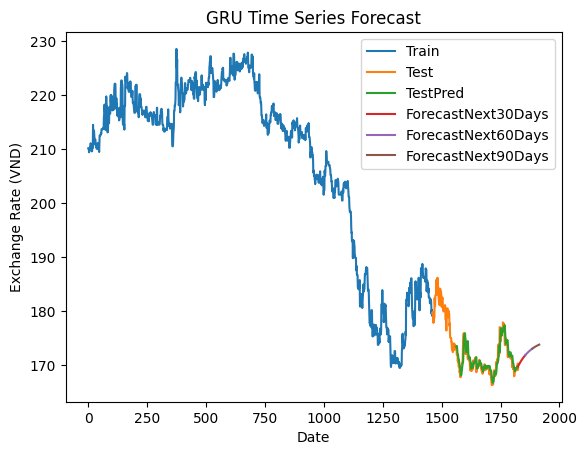

- Model accuracy evaluation: 
RMSE = 1.184136074717653
MAPE = 0.4933336379677357
MAE = 0.845855696707061


In [59]:
implementGRU(train_jpy_2_sc, test_jpy_2_sc)

* Case 9:1

Epoch 1/100


C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.1029 - val_loss: 0.0150
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0060 - val_loss: 0.0087
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0022 - val_loss: 0.0021
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 7.8043e-04 - val_loss: 4.0044e-04
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 4.6216e-04 - val_loss: 2.8371e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 4.0962e-04 - val_loss: 2.8209e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 4.2681e-04 - val_loss: 2.7891e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 4.0437e-04 - val_loss: 2.7490e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 4.1974e-04 - val_loss: 2.7152e-04
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 3.6747e-04 - val_loss: 2.6836e-04
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 3.8282e-04 - val_loss: 2.6548e-04


Epoch 65/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 2.7654e-04 - val_loss: 2.1309e-04
Epoch 66/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 2.7931e-04 - val_loss: 2.1291e-04
Epoch 67/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 3.0996e-04 - val_loss: 2.1331e-04
Epoch 68/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 2.7739e-04 - val_loss: 2.1201e-04
Epoch 69/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 3.0577e-04 - val_loss: 2.1381e-04
Epoch 70/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 2.9189e-04 - val_loss: 2.1081e-04
Epoch 71/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 3.3010e-04 - val_loss: 2.1187e-04
Epoch 72/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 2.8269e-04 - val_loss: 2.2005e-04
Epoch 73/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 2.9384e-04 - val_loss: 2.1294e-04
Epoch 74/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 2.7668e-04 - val_loss: 2.2342e-04
Epoch 75/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/st

5 day output [[0.04538877]]
6 day input [0.06160757 0.06898765 0.0612867  0.0612867  0.0612867  0.07684903
 0.07091288 0.06866677 0.10717151 0.12000642 0.12000642 0.12000642
 0.08471041 0.10075405 0.09337398 0.17182737 0.17054388 0.17054388
 0.17054388 0.16877908 0.13043478 0.14631798 0.15129151 0.15963421
 0.15963421 0.15963421 0.15754853 0.16348468 0.16300337 0.18626665
 0.17006257 0.17006257 0.17006257 0.18305792 0.18145355 0.16781646
 0.14310926 0.11856249 0.11856249 0.11856249 0.12754693 0.1384566
 0.12642387 0.12145034 0.13396438 0.13396438 0.13396438 0.12112947
 0.11070111 0.08406867 0.08535216 0.08390823 0.08390823 0.08390823
 0.08214343 0.09112787 0.09898925 0.09754532 0.09401572 0.09401572
 0.09401572 0.08615434 0.07781165 0.08118081 0.08968394 0.08454998
 0.08454998 0.08454998 0.05647361 0.0524627  0.07059201 0.05888015
 0.04684742 0.04684742 0.04684742 0.0506979  0.04251564 0.02583026
 0.03818386 0.0454035  0.0454035  0.0454035  0.04957484 0.04219477
 0.04524306 0.05053746 

13 day output [[0.03990067]]
14 day input [0.10717151 0.12000642 0.12000642 0.12000642 0.08471041 0.10075405
 0.09337398 0.17182737 0.17054388 0.17054388 0.17054388 0.16877908
 0.13043478 0.14631798 0.15129151 0.15963421 0.15963421 0.15963421
 0.15754853 0.16348468 0.16300337 0.18626665 0.17006257 0.17006257
 0.17006257 0.18305792 0.18145355 0.16781646 0.14310926 0.11856249
 0.11856249 0.11856249 0.12754693 0.1384566  0.12642387 0.12145034
 0.13396438 0.13396438 0.13396438 0.12112947 0.11070111 0.08406867
 0.08535216 0.08390823 0.08390823 0.08390823 0.08214343 0.09112787
 0.09898925 0.09754532 0.09401572 0.09401572 0.09401572 0.08615434
 0.07781165 0.08118081 0.08968394 0.08454998 0.08454998 0.08454998
 0.05647361 0.0524627  0.07059201 0.05888015 0.04684742 0.04684742
 0.04684742 0.0506979  0.04251564 0.02583026 0.03818386 0.0454035
 0.0454035  0.0454035  0.04957484 0.04219477 0.04524306 0.05053746
 0.04989572 0.04989572 0.04989572 0.05519012 0.05310444 0.04412001
 0.06369325 0.0470078

21 day output [[0.03492898]]
22 day input [0.17054388 0.17054388 0.17054388 0.16877908 0.13043478 0.14631798
 0.15129151 0.15963421 0.15963421 0.15963421 0.15754853 0.16348468
 0.16300337 0.18626665 0.17006257 0.17006257 0.17006257 0.18305792
 0.18145355 0.16781646 0.14310926 0.11856249 0.11856249 0.11856249
 0.12754693 0.1384566  0.12642387 0.12145034 0.13396438 0.13396438
 0.13396438 0.12112947 0.11070111 0.08406867 0.08535216 0.08390823
 0.08390823 0.08390823 0.08214343 0.09112787 0.09898925 0.09754532
 0.09401572 0.09401572 0.09401572 0.08615434 0.07781165 0.08118081
 0.08968394 0.08454998 0.08454998 0.08454998 0.05647361 0.0524627
 0.07059201 0.05888015 0.04684742 0.04684742 0.04684742 0.0506979
 0.04251564 0.02583026 0.03818386 0.0454035  0.0454035  0.0454035
 0.04957484 0.04219477 0.04524306 0.05053746 0.04989572 0.04989572
 0.04989572 0.05519012 0.05310444 0.04412001 0.06369325 0.04700786
 0.04918564 0.04840143 0.04762131 0.04686245 0.0461191  0.04538877
 0.04466989 0.04396143 

31 day output [[0.02934843]]
32 day input [0.15754853 0.16348468 0.16300337 0.18626665 0.17006257 0.17006257
 0.17006257 0.18305792 0.18145355 0.16781646 0.14310926 0.11856249
 0.11856249 0.11856249 0.12754693 0.1384566  0.12642387 0.12145034
 0.13396438 0.13396438 0.13396438 0.12112947 0.11070111 0.08406867
 0.08535216 0.08390823 0.08390823 0.08390823 0.08214343 0.09112787
 0.09898925 0.09754532 0.09401572 0.09401572 0.09401572 0.08615434
 0.07781165 0.08118081 0.08968394 0.08454998 0.08454998 0.08454998
 0.05647361 0.0524627  0.07059201 0.05888015 0.04684742 0.04684742
 0.04684742 0.0506979  0.04251564 0.02583026 0.03818386 0.0454035
 0.0454035  0.0454035  0.04957484 0.04219477 0.04524306 0.05053746
 0.04989572 0.04989572 0.04989572 0.05519012 0.05310444 0.04412001
 0.06369325 0.04700786 0.04918564 0.04840143 0.04762131 0.04686245
 0.0461191  0.04538877 0.04466989 0.04396143 0.04326269 0.04257317
 0.0418925  0.04122033 0.04055646 0.03990067 0.03925279 0.03861268
 0.03798021 0.0373552

41 day output [[0.02440321]]
42 day input [0.14310926 0.11856249 0.11856249 0.11856249 0.12754693 0.1384566
 0.12642387 0.12145034 0.13396438 0.13396438 0.13396438 0.12112947
 0.11070111 0.08406867 0.08535216 0.08390823 0.08390823 0.08390823
 0.08214343 0.09112787 0.09898925 0.09754532 0.09401572 0.09401572
 0.09401572 0.08615434 0.07781165 0.08118081 0.08968394 0.08454998
 0.08454998 0.08454998 0.05647361 0.0524627  0.07059201 0.05888015
 0.04684742 0.04684742 0.04684742 0.0506979  0.04251564 0.02583026
 0.03818386 0.0454035  0.0454035  0.0454035  0.04957484 0.04219477
 0.04524306 0.05053746 0.04989572 0.04989572 0.04989572 0.05519012
 0.05310444 0.04412001 0.06369325 0.04700786 0.04918564 0.04840143
 0.04762131 0.04686245 0.0461191  0.04538877 0.04466989 0.04396143
 0.04326269 0.04257317 0.0418925  0.04122033 0.04055646 0.03990067
 0.03925279 0.03861268 0.03798021 0.03735529 0.03673779 0.03612763
 0.03552473 0.03492898 0.03434031 0.03375865 0.03318391 0.03261602
 0.0320549  0.0315005

51 day output [[0.02002718]]
52 day input [0.13396438 0.12112947 0.11070111 0.08406867 0.08535216 0.08390823
 0.08390823 0.08390823 0.08214343 0.09112787 0.09898925 0.09754532
 0.09401572 0.09401572 0.09401572 0.08615434 0.07781165 0.08118081
 0.08968394 0.08454998 0.08454998 0.08454998 0.05647361 0.0524627
 0.07059201 0.05888015 0.04684742 0.04684742 0.04684742 0.0506979
 0.04251564 0.02583026 0.03818386 0.0454035  0.0454035  0.0454035
 0.04957484 0.04219477 0.04524306 0.05053746 0.04989572 0.04989572
 0.04989572 0.05519012 0.05310444 0.04412001 0.06369325 0.04700786
 0.04918564 0.04840143 0.04762131 0.04686245 0.0461191  0.04538877
 0.04466989 0.04396143 0.04326269 0.04257317 0.0418925  0.04122033
 0.04055646 0.03990067 0.03925279 0.03861268 0.03798021 0.03735529
 0.03673779 0.03612763 0.03552473 0.03492898 0.03434031 0.03375865
 0.03318391 0.03261602 0.0320549  0.0315005  0.03095271 0.03041149
 0.02987675 0.02934843 0.02882645 0.02831076 0.02780127 0.02729793
 0.02680067 0.02630942 

61 day output [[0.01615981]]
62 day input [0.09898925 0.09754532 0.09401572 0.09401572 0.09401572 0.08615434
 0.07781165 0.08118081 0.08968394 0.08454998 0.08454998 0.08454998
 0.05647361 0.0524627  0.07059201 0.05888015 0.04684742 0.04684742
 0.04684742 0.0506979  0.04251564 0.02583026 0.03818386 0.0454035
 0.0454035  0.0454035  0.04957484 0.04219477 0.04524306 0.05053746
 0.04989572 0.04989572 0.04989572 0.05519012 0.05310444 0.04412001
 0.06369325 0.04700786 0.04918564 0.04840143 0.04762131 0.04686245
 0.0461191  0.04538877 0.04466989 0.04396143 0.04326269 0.04257317
 0.0418925  0.04122033 0.04055646 0.03990067 0.03925279 0.03861268
 0.03798021 0.03735529 0.03673779 0.03612763 0.03552473 0.03492898
 0.03434031 0.03375865 0.03318391 0.03261602 0.0320549  0.0315005
 0.03095271 0.03041149 0.02987675 0.02934843 0.02882645 0.02831076
 0.02780127 0.02729793 0.02680067 0.02630942 0.02582411 0.02534469
 0.02487107 0.02440321 0.02394103 0.02348449 0.0230335  0.02258801
 0.02214796 0.02171329

71 day output [[0.0127458]]
72 day input [0.08454998 0.08454998 0.05647361 0.0524627  0.07059201 0.05888015
 0.04684742 0.04684742 0.04684742 0.0506979  0.04251564 0.02583026
 0.03818386 0.0454035  0.0454035  0.0454035  0.04957484 0.04219477
 0.04524306 0.05053746 0.04989572 0.04989572 0.04989572 0.05519012
 0.05310444 0.04412001 0.06369325 0.04700786 0.04918564 0.04840143
 0.04762131 0.04686245 0.0461191  0.04538877 0.04466989 0.04396143
 0.04326269 0.04257317 0.0418925  0.04122033 0.04055646 0.03990067
 0.03925279 0.03861268 0.03798021 0.03735529 0.03673779 0.03612763
 0.03552473 0.03492898 0.03434031 0.03375865 0.03318391 0.03261602
 0.0320549  0.0315005  0.03095271 0.03041149 0.02987675 0.02934843
 0.02882645 0.02831076 0.02780127 0.02729793 0.02680067 0.02630942
 0.02582411 0.02534469 0.02487107 0.02440321 0.02394103 0.02348449
 0.0230335  0.02258801 0.02214796 0.02171329 0.02128393 0.02085984
 0.02044094 0.02002718 0.01961851 0.01921486 0.01881618 0.01842241
 0.01803349 0.0176493

80 day output [[0.01001927]]
81 day input [0.0506979  0.04251564 0.02583026 0.03818386 0.0454035  0.0454035
 0.0454035  0.04957484 0.04219477 0.04524306 0.05053746 0.04989572
 0.04989572 0.04989572 0.05519012 0.05310444 0.04412001 0.06369325
 0.04700786 0.04918564 0.04840143 0.04762131 0.04686245 0.0461191
 0.04538877 0.04466989 0.04396143 0.04326269 0.04257317 0.0418925
 0.04122033 0.04055646 0.03990067 0.03925279 0.03861268 0.03798021
 0.03735529 0.03673779 0.03612763 0.03552473 0.03492898 0.03434031
 0.03375865 0.03318391 0.03261602 0.0320549  0.0315005  0.03095271
 0.03041149 0.02987675 0.02934843 0.02882645 0.02831076 0.02780127
 0.02729793 0.02680067 0.02630942 0.02582411 0.02534469 0.02487107
 0.02440321 0.02394103 0.02348449 0.0230335  0.02258801 0.02214796
 0.02171329 0.02128393 0.02085984 0.02044094 0.02002718 0.01961851
 0.01921486 0.01881618 0.01842241 0.01803349 0.01764937 0.01727
 0.01689532 0.01652527 0.01615981 0.01579887 0.01544241 0.01509038
 0.01474272 0.01439938 0.0

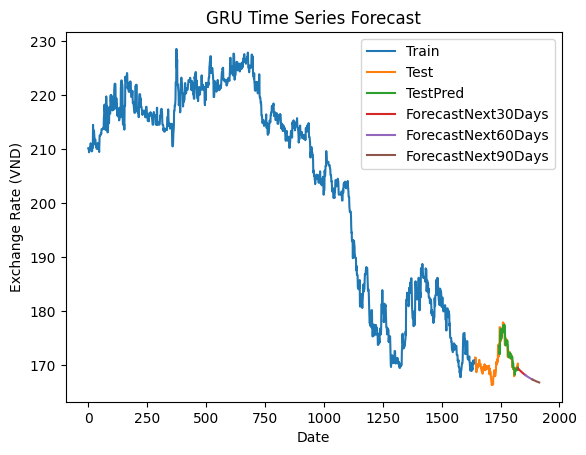

- Model accuracy evaluation: 
RMSE = 1.1941524406557606
MAPE = 0.45695450559577633
MAE = 0.7927025176257632


In [60]:
implementGRU(train_jpy_3_sc, test_jpy_3_sc)

**GBP_VND**

* Case 7:3

Epoch 1/100


C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.3841 - val_loss: 0.0036
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0138 - val_loss: 0.0032
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0075 - val_loss: 0.0029
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0056 - val_loss: 0.0027
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0048 - val_loss: 0.0022
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0037 - val_loss: 0.0018
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0032 - val_loss: 0.0015
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0025 - val_loss: 0.0012
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0020 - val_loss: 8.9719e-04
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0015 - val_loss: 7.3015e-04
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0012 - val_loss: 6.0841e-04
Epoch 12/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 4.3595e-04 - val_loss: 3.4404e-04
Epoch 66/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 5.6064e-04 - val_loss: 3.8407e-04
Epoch 67/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 4.3865e-04 - val_loss: 3.4280e-04
Epoch 68/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 4.5721e-04 - val_loss: 3.4248e-04
Epoch 69/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 4.7022e-04 - val_loss: 3.5316e-04
Epoch 70/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 4.8247e-04 - val_loss: 3.4507e-04
Epoch 71/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 4.3338e-04 - val_loss: 3.5262e-04
Epoch 72/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 4.3790e-04 - val_loss: 3.3910e-04
Epoch 73/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 5.1601e-04 - val_loss: 3.7393e-04
Epoch 74/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 4.5599e-04 - val_loss: 3.3776e-04
Epoch 75/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 4.

6 day output [[0.81100243]]
7 day input [0.75279825 0.75648376 0.75648376 0.75648376 0.74979525 0.74105924
 0.73027573 0.72167622 0.71048321 0.71048321 0.71048321 0.71116571
 0.71280371 0.70611521 0.74542725 0.78132678 0.78132678 0.78132678
 0.77354627 0.77764128 0.76180726 0.74938575 0.75593776 0.75593776
 0.75593776 0.75880426 0.76822277 0.78200928 0.79183729 0.76535627
 0.76535627 0.76535627 0.76931477 0.78924379 0.75812176 0.78241878
 0.76781327 0.76781327 0.76781327 0.76713077 0.78692329 0.7959323
 0.81094731 0.82350532 0.82350532 0.82350532 0.80644281 0.79429429
 0.78910729 0.8043953  0.8034398  0.8034398  0.8034398  0.80985531
 0.82295932 0.82555283 0.83114933 0.82241332 0.82241332 0.82241332
 0.80835381 0.77231777 0.78269178 0.76835927 0.78883429 0.78883429
 0.78883429 0.75279825 0.72836473 0.76194376 0.76412776 0.76030576
 0.76030576 0.76030576 0.76385476 0.76904177 0.73983074 0.74406224
 0.76999727 0.76999727 0.76999727 0.78228228 0.76972427 0.77559378
 0.81927382 0.82022932 

15 day output [[0.8173955]]
16 day input [0.71048321 0.71048321 0.71116571 0.71280371 0.70611521 0.74542725
 0.78132678 0.78132678 0.78132678 0.77354627 0.77764128 0.76180726
 0.74938575 0.75593776 0.75593776 0.75593776 0.75880426 0.76822277
 0.78200928 0.79183729 0.76535627 0.76535627 0.76535627 0.76931477
 0.78924379 0.75812176 0.78241878 0.76781327 0.76781327 0.76781327
 0.76713077 0.78692329 0.7959323  0.81094731 0.82350532 0.82350532
 0.82350532 0.80644281 0.79429429 0.78910729 0.8043953  0.8034398
 0.8034398  0.8034398  0.80985531 0.82295932 0.82555283 0.83114933
 0.82241332 0.82241332 0.82241332 0.80835381 0.77231777 0.78269178
 0.76835927 0.78883429 0.78883429 0.78883429 0.75279825 0.72836473
 0.76194376 0.76412776 0.76030576 0.76030576 0.76030576 0.76385476
 0.76904177 0.73983074 0.74406224 0.76999727 0.76999727 0.76999727
 0.78228228 0.76972427 0.77559378 0.81927382 0.82022932 0.82022932
 0.82022932 0.82637183 0.82159432 0.8030303  0.81572482 0.8030303
 0.80812383 0.80753779 

23 day output [[0.82320744]]
24 day input [0.78132678 0.77354627 0.77764128 0.76180726 0.74938575 0.75593776
 0.75593776 0.75593776 0.75880426 0.76822277 0.78200928 0.79183729
 0.76535627 0.76535627 0.76535627 0.76931477 0.78924379 0.75812176
 0.78241878 0.76781327 0.76781327 0.76781327 0.76713077 0.78692329
 0.7959323  0.81094731 0.82350532 0.82350532 0.82350532 0.80644281
 0.79429429 0.78910729 0.8043953  0.8034398  0.8034398  0.8034398
 0.80985531 0.82295932 0.82555283 0.83114933 0.82241332 0.82241332
 0.82241332 0.80835381 0.77231777 0.78269178 0.76835927 0.78883429
 0.78883429 0.78883429 0.75279825 0.72836473 0.76194376 0.76412776
 0.76030576 0.76030576 0.76030576 0.76385476 0.76904177 0.73983074
 0.74406224 0.76999727 0.76999727 0.76999727 0.78228228 0.76972427
 0.77559378 0.81927382 0.82022932 0.82022932 0.82022932 0.82637183
 0.82159432 0.8030303  0.81572482 0.8030303  0.80812383 0.80753779
 0.80828619 0.80894476 0.80962229 0.81030935 0.81100243 0.81170076
 0.81240332 0.8131094

32 day output [[0.8299103]]
33 day input [0.76822277 0.78200928 0.79183729 0.76535627 0.76535627 0.76535627
 0.76931477 0.78924379 0.75812176 0.78241878 0.76781327 0.76781327
 0.76781327 0.76713077 0.78692329 0.7959323  0.81094731 0.82350532
 0.82350532 0.82350532 0.80644281 0.79429429 0.78910729 0.8043953
 0.8034398  0.8034398  0.8034398  0.80985531 0.82295932 0.82555283
 0.83114933 0.82241332 0.82241332 0.82241332 0.80835381 0.77231777
 0.78269178 0.76835927 0.78883429 0.78883429 0.78883429 0.75279825
 0.72836473 0.76194376 0.76412776 0.76030576 0.76030576 0.76030576
 0.76385476 0.76904177 0.73983074 0.74406224 0.76999727 0.76999727
 0.76999727 0.78228228 0.76972427 0.77559378 0.81927382 0.82022932
 0.82022932 0.82022932 0.82637183 0.82159432 0.8030303  0.81572482
 0.8030303  0.80812383 0.80753779 0.80828619 0.80894476 0.80962229
 0.81030935 0.81100243 0.81170076 0.81240332 0.8131094  0.81381845
 0.81452978 0.81524354 0.81595922 0.81667644 0.81739551 0.81811595
 0.8188383  0.81956196

40 day output [[0.8360492]]
41 day input [0.75812176 0.78241878 0.76781327 0.76781327 0.76781327 0.76713077
 0.78692329 0.7959323  0.81094731 0.82350532 0.82350532 0.82350532
 0.80644281 0.79429429 0.78910729 0.8043953  0.8034398  0.8034398
 0.8034398  0.80985531 0.82295932 0.82555283 0.83114933 0.82241332
 0.82241332 0.82241332 0.80835381 0.77231777 0.78269178 0.76835927
 0.78883429 0.78883429 0.78883429 0.75279825 0.72836473 0.76194376
 0.76412776 0.76030576 0.76030576 0.76030576 0.76385476 0.76904177
 0.73983074 0.74406224 0.76999727 0.76999727 0.76999727 0.78228228
 0.76972427 0.77559378 0.81927382 0.82022932 0.82022932 0.82022932
 0.82637183 0.82159432 0.8030303  0.81572482 0.8030303  0.80812383
 0.80753779 0.80828619 0.80894476 0.80962229 0.81030935 0.81100243
 0.81170076 0.81240332 0.8131094  0.81381845 0.81452978 0.81524354
 0.81595922 0.81667644 0.81739551 0.81811595 0.8188383  0.81956196
 0.82028747 0.82101417 0.82174301 0.82247424 0.82320744 0.82394296
 0.82468075 0.82542092

50 day output [[0.84400856]]
51 day input [0.82350532 0.82350532 0.80644281 0.79429429 0.78910729 0.8043953
 0.8034398  0.8034398  0.8034398  0.80985531 0.82295932 0.82555283
 0.83114933 0.82241332 0.82241332 0.82241332 0.80835381 0.77231777
 0.78269178 0.76835927 0.78883429 0.78883429 0.78883429 0.75279825
 0.72836473 0.76194376 0.76412776 0.76030576 0.76030576 0.76030576
 0.76385476 0.76904177 0.73983074 0.74406224 0.76999727 0.76999727
 0.76999727 0.78228228 0.76972427 0.77559378 0.81927382 0.82022932
 0.82022932 0.82022932 0.82637183 0.82159432 0.8030303  0.81572482
 0.8030303  0.80812383 0.80753779 0.80828619 0.80894476 0.80962229
 0.81030935 0.81100243 0.81170076 0.81240332 0.8131094  0.81381845
 0.81452978 0.81524354 0.81595922 0.81667644 0.81739551 0.81811595
 0.8188383  0.81956196 0.82028747 0.82101417 0.82174301 0.82247424
 0.82320744 0.82394296 0.82468075 0.82542092 0.82616311 0.82690752
 0.82765466 0.82840389 0.82915586 0.82991028 0.8306675  0.83142751
 0.83219057 0.8329561

60 day output [[0.85235244]]
61 day input [0.82295932 0.82555283 0.83114933 0.82241332 0.82241332 0.82241332
 0.80835381 0.77231777 0.78269178 0.76835927 0.78883429 0.78883429
 0.78883429 0.75279825 0.72836473 0.76194376 0.76412776 0.76030576
 0.76030576 0.76030576 0.76385476 0.76904177 0.73983074 0.74406224
 0.76999727 0.76999727 0.76999727 0.78228228 0.76972427 0.77559378
 0.81927382 0.82022932 0.82022932 0.82022932 0.82637183 0.82159432
 0.8030303  0.81572482 0.8030303  0.80812383 0.80753779 0.80828619
 0.80894476 0.80962229 0.81030935 0.81100243 0.81170076 0.81240332
 0.8131094  0.81381845 0.81452978 0.81524354 0.81595922 0.81667644
 0.81739551 0.81811595 0.8188383  0.81956196 0.82028747 0.82101417
 0.82174301 0.82247424 0.82320744 0.82394296 0.82468075 0.82542092
 0.82616311 0.82690752 0.82765466 0.82840389 0.82915586 0.82991028
 0.8306675  0.83142751 0.83219057 0.83295619 0.83372498 0.83449656
 0.83527118 0.8360492  0.8368299  0.83761424 0.83840173 0.83919245
 0.8399865  0.840783

70 day output [[0.86114895]]
71 day input [0.78883429 0.78883429 0.78883429 0.75279825 0.72836473 0.76194376
 0.76412776 0.76030576 0.76030576 0.76030576 0.76385476 0.76904177
 0.73983074 0.74406224 0.76999727 0.76999727 0.76999727 0.78228228
 0.76972427 0.77559378 0.81927382 0.82022932 0.82022932 0.82022932
 0.82637183 0.82159432 0.8030303  0.81572482 0.8030303  0.80812383
 0.80753779 0.80828619 0.80894476 0.80962229 0.81030935 0.81100243
 0.81170076 0.81240332 0.8131094  0.81381845 0.81452978 0.81524354
 0.81595922 0.81667644 0.81739551 0.81811595 0.8188383  0.81956196
 0.82028747 0.82101417 0.82174301 0.82247424 0.82320744 0.82394296
 0.82468075 0.82542092 0.82616311 0.82690752 0.82765466 0.82840389
 0.82915586 0.82991028 0.8306675  0.83142751 0.83219057 0.83295619
 0.83372498 0.83449656 0.83527118 0.8360492  0.8368299  0.83761424
 0.83840173 0.83919245 0.8399865  0.84078377 0.8415845  0.84238869
 0.84319669 0.84400856 0.84482443 0.84564453 0.84646875 0.84729707
 0.84812903 0.848965

79 day output [[0.869488]]
80 day input [0.76030576 0.76385476 0.76904177 0.73983074 0.74406224 0.76999727
 0.76999727 0.76999727 0.78228228 0.76972427 0.77559378 0.81927382
 0.82022932 0.82022932 0.82022932 0.82637183 0.82159432 0.8030303
 0.81572482 0.8030303  0.80812383 0.80753779 0.80828619 0.80894476
 0.80962229 0.81030935 0.81100243 0.81170076 0.81240332 0.8131094
 0.81381845 0.81452978 0.81524354 0.81595922 0.81667644 0.81739551
 0.81811595 0.8188383  0.81956196 0.82028747 0.82101417 0.82174301
 0.82247424 0.82320744 0.82394296 0.82468075 0.82542092 0.82616311
 0.82690752 0.82765466 0.82840389 0.82915586 0.82991028 0.8306675
 0.83142751 0.83219057 0.83295619 0.83372498 0.83449656 0.83527118
 0.8360492  0.8368299  0.83761424 0.83840173 0.83919245 0.8399865
 0.84078377 0.8415845  0.84238869 0.84319669 0.84400856 0.84482443
 0.84564453 0.84646875 0.84729707 0.84812903 0.84896535 0.84980565
 0.85065037 0.85149932 0.85235244 0.85321027 0.85407287 0.85494012
 0.85581231 0.85668939 0.8

87 day output [[0.87724483]]
88 day input [0.78228228 0.76972427 0.77559378 0.81927382 0.82022932 0.82022932
 0.82022932 0.82637183 0.82159432 0.8030303  0.81572482 0.8030303
 0.80812383 0.80753779 0.80828619 0.80894476 0.80962229 0.81030935
 0.81100243 0.81170076 0.81240332 0.8131094  0.81381845 0.81452978
 0.81524354 0.81595922 0.81667644 0.81739551 0.81811595 0.8188383
 0.81956196 0.82028747 0.82101417 0.82174301 0.82247424 0.82320744
 0.82394296 0.82468075 0.82542092 0.82616311 0.82690752 0.82765466
 0.82840389 0.82915586 0.82991028 0.8306675  0.83142751 0.83219057
 0.83295619 0.83372498 0.83449656 0.83527118 0.8360492  0.8368299
 0.83761424 0.83840173 0.83919245 0.8399865  0.84078377 0.8415845
 0.84238869 0.84319669 0.84400856 0.84482443 0.84564453 0.84646875
 0.84729707 0.84812903 0.84896535 0.84980565 0.85065037 0.85149932
 0.85235244 0.85321027 0.85407287 0.85494012 0.85581231 0.85668939
 0.85757148 0.85845894 0.8593508  0.86024767 0.86114895 0.8620553
 0.86296695 0.86388397 0.

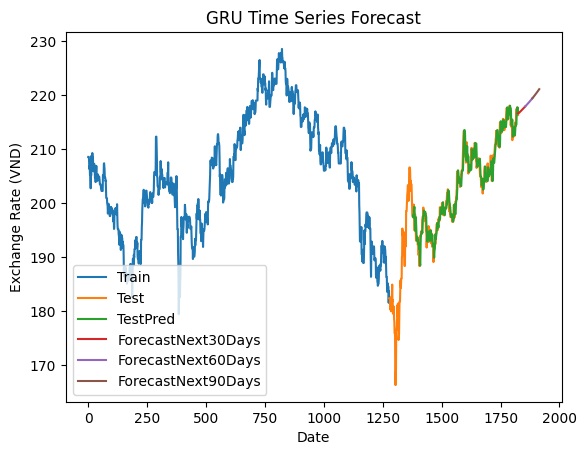

- Model accuracy evaluation: 
RMSE = 1.48620013945735
MAPE = 0.5527030780931117
MAE = 1.1245995991172417


In [61]:
implementGRU(train_gbp_1_sc, test_gbp_1_sc)

* Case 8:2

Epoch 1/100


C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.1553 - val_loss: 0.0093
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0083 - val_loss: 0.0024
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0035 - val_loss: 0.0011
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0027 - val_loss: 6.8071e-04
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0020 - val_loss: 5.7184e-04
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0014 - val_loss: 5.1517e-04
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0011 - val_loss: 4.6054e-04
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 9.1131e-04 - val_loss: 4.4302e-04
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 8.1575e-04 - val_loss: 4.2747e-04
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 7.7356e-04 - val_loss: 4.5538e-04
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 7.4574e-04 - val_loss: 4.3652e-04
Epoch 12/100
22/

Epoch 65/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 4.6217e-04 - val_loss: 3.8533e-04
Epoch 66/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 4.8430e-04 - val_loss: 2.9515e-04
Epoch 67/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 5.0297e-04 - val_loss: 3.9157e-04
Epoch 68/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 5.0310e-04 - val_loss: 2.9627e-04
Epoch 69/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 5.3889e-04 - val_loss: 2.9407e-04
Epoch 70/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 4.9649e-04 - val_loss: 3.2153e-04
Epoch 71/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 5.4011e-04 - val_loss: 2.9131e-04
Epoch 72/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 5.2763e-04 - val_loss: 2.9673e-04
Epoch 73/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 4.9361e-04 - val_loss: 2.8743e-04
Epoch 74/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 5.1723e-04 - val_loss: 3.2864e-04
Epoch 75/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/st

4 day output [[0.80819803]]
5 day input [0.73450723 0.75580126 0.75279825 0.75648376 0.75648376 0.75648376
 0.74979525 0.74105924 0.73027573 0.72167622 0.71048321 0.71048321
 0.71048321 0.71116571 0.71280371 0.70611521 0.74542725 0.78132678
 0.78132678 0.78132678 0.77354627 0.77764128 0.76180726 0.74938575
 0.75593776 0.75593776 0.75593776 0.75880426 0.76822277 0.78200928
 0.79183729 0.76535627 0.76535627 0.76535627 0.76931477 0.78924379
 0.75812176 0.78241878 0.76781327 0.76781327 0.76781327 0.76713077
 0.78692329 0.7959323  0.81094731 0.82350532 0.82350532 0.82350532
 0.80644281 0.79429429 0.78910729 0.8043953  0.8034398  0.8034398
 0.8034398  0.80985531 0.82295932 0.82555283 0.83114933 0.82241332
 0.82241332 0.82241332 0.80835381 0.77231777 0.78269178 0.76835927
 0.78883429 0.78883429 0.78883429 0.75279825 0.72836473 0.76194376
 0.76412776 0.76030576 0.76030576 0.76030576 0.76385476 0.76904177
 0.73983074 0.74406224 0.76999727 0.76999727 0.76999727 0.78228228
 0.76972427 0.77559378 

12 day output [[0.8128144]]
13 day input [0.73027573 0.72167622 0.71048321 0.71048321 0.71048321 0.71116571
 0.71280371 0.70611521 0.74542725 0.78132678 0.78132678 0.78132678
 0.77354627 0.77764128 0.76180726 0.74938575 0.75593776 0.75593776
 0.75593776 0.75880426 0.76822277 0.78200928 0.79183729 0.76535627
 0.76535627 0.76535627 0.76931477 0.78924379 0.75812176 0.78241878
 0.76781327 0.76781327 0.76781327 0.76713077 0.78692329 0.7959323
 0.81094731 0.82350532 0.82350532 0.82350532 0.80644281 0.79429429
 0.78910729 0.8043953  0.8034398  0.8034398  0.8034398  0.80985531
 0.82295932 0.82555283 0.83114933 0.82241332 0.82241332 0.82241332
 0.80835381 0.77231777 0.78269178 0.76835927 0.78883429 0.78883429
 0.78883429 0.75279825 0.72836473 0.76194376 0.76412776 0.76030576
 0.76030576 0.76030576 0.76385476 0.76904177 0.73983074 0.74406224
 0.76999727 0.76999727 0.76999727 0.78228228 0.76972427 0.77559378
 0.81927382 0.82022932 0.82022932 0.82022932 0.82637183 0.82159432
 0.8030303  0.81572482

23 day output [[0.81938744]]
24 day input [0.78132678 0.77354627 0.77764128 0.76180726 0.74938575 0.75593776
 0.75593776 0.75593776 0.75880426 0.76822277 0.78200928 0.79183729
 0.76535627 0.76535627 0.76535627 0.76931477 0.78924379 0.75812176
 0.78241878 0.76781327 0.76781327 0.76781327 0.76713077 0.78692329
 0.7959323  0.81094731 0.82350532 0.82350532 0.82350532 0.80644281
 0.79429429 0.78910729 0.8043953  0.8034398  0.8034398  0.8034398
 0.80985531 0.82295932 0.82555283 0.83114933 0.82241332 0.82241332
 0.82241332 0.80835381 0.77231777 0.78269178 0.76835927 0.78883429
 0.78883429 0.78883429 0.75279825 0.72836473 0.76194376 0.76412776
 0.76030576 0.76030576 0.76030576 0.76385476 0.76904177 0.73983074
 0.74406224 0.76999727 0.76999727 0.76999727 0.78228228 0.76972427
 0.77559378 0.81927382 0.82022932 0.82022932 0.82022932 0.82637183
 0.82159432 0.8030303  0.81572482 0.8030303  0.80685741 0.80640835
 0.8070485  0.80762094 0.80819803 0.80877644 0.80935103 0.8099277
 0.81050295 0.81107873

33 day output [[0.8254245]]
34 day input [0.78200928 0.79183729 0.76535627 0.76535627 0.76535627 0.76931477
 0.78924379 0.75812176 0.78241878 0.76781327 0.76781327 0.76781327
 0.76713077 0.78692329 0.7959323  0.81094731 0.82350532 0.82350532
 0.82350532 0.80644281 0.79429429 0.78910729 0.8043953  0.8034398
 0.8034398  0.8034398  0.80985531 0.82295932 0.82555283 0.83114933
 0.82241332 0.82241332 0.82241332 0.80835381 0.77231777 0.78269178
 0.76835927 0.78883429 0.78883429 0.78883429 0.75279825 0.72836473
 0.76194376 0.76412776 0.76030576 0.76030576 0.76030576 0.76385476
 0.76904177 0.73983074 0.74406224 0.76999727 0.76999727 0.76999727
 0.78228228 0.76972427 0.77559378 0.81927382 0.82022932 0.82022932
 0.82022932 0.82637183 0.82159432 0.8030303  0.81572482 0.8030303
 0.80685741 0.80640835 0.8070485  0.80762094 0.80819803 0.80877644
 0.80935103 0.8099277  0.81050295 0.81107873 0.81165469 0.81223315
 0.81281441 0.81339991 0.81398958 0.81458408 0.81518096 0.81578135
 0.81638485 0.81699115 

44 day output [[0.8321964]]
45 day input [0.76781327 0.76713077 0.78692329 0.7959323  0.81094731 0.82350532
 0.82350532 0.82350532 0.80644281 0.79429429 0.78910729 0.8043953
 0.8034398  0.8034398  0.8034398  0.80985531 0.82295932 0.82555283
 0.83114933 0.82241332 0.82241332 0.82241332 0.80835381 0.77231777
 0.78269178 0.76835927 0.78883429 0.78883429 0.78883429 0.75279825
 0.72836473 0.76194376 0.76412776 0.76030576 0.76030576 0.76030576
 0.76385476 0.76904177 0.73983074 0.74406224 0.76999727 0.76999727
 0.76999727 0.78228228 0.76972427 0.77559378 0.81927382 0.82022932
 0.82022932 0.82022932 0.82637183 0.82159432 0.8030303  0.81572482
 0.8030303  0.80685741 0.80640835 0.8070485  0.80762094 0.80819803
 0.80877644 0.80935103 0.8099277  0.81050295 0.81107873 0.81165469
 0.81223315 0.81281441 0.81339991 0.81398958 0.81458408 0.81518096
 0.81578135 0.81638485 0.81699115 0.81759942 0.81819844 0.81879246
 0.81938744 0.81998211 0.82057887 0.82117575 0.82177848 0.82238406
 0.82298982 0.82359785

55 day output [[0.8390264]]
56 day input [0.8043953  0.8034398  0.8034398  0.8034398  0.80985531 0.82295932
 0.82555283 0.83114933 0.82241332 0.82241332 0.82241332 0.80835381
 0.77231777 0.78269178 0.76835927 0.78883429 0.78883429 0.78883429
 0.75279825 0.72836473 0.76194376 0.76412776 0.76030576 0.76030576
 0.76030576 0.76385476 0.76904177 0.73983074 0.74406224 0.76999727
 0.76999727 0.76999727 0.78228228 0.76972427 0.77559378 0.81927382
 0.82022932 0.82022932 0.82022932 0.82637183 0.82159432 0.8030303
 0.81572482 0.8030303  0.80685741 0.80640835 0.8070485  0.80762094
 0.80819803 0.80877644 0.80935103 0.8099277  0.81050295 0.81107873
 0.81165469 0.81223315 0.81281441 0.81339991 0.81398958 0.81458408
 0.81518096 0.81578135 0.81638485 0.81699115 0.81759942 0.81819844
 0.81879246 0.81938744 0.81998211 0.82057887 0.82117575 0.82177848
 0.82238406 0.82298982 0.82359785 0.82420725 0.8248167  0.82542449
 0.82603037 0.82663673 0.82725066 0.82786435 0.82847995 0.82909518
 0.82970905 0.83033097

66 day output [[0.8458328]]
67 day input [0.80835381 0.77231777 0.78269178 0.76835927 0.78883429 0.78883429
 0.78883429 0.75279825 0.72836473 0.76194376 0.76412776 0.76030576
 0.76030576 0.76030576 0.76385476 0.76904177 0.73983074 0.74406224
 0.76999727 0.76999727 0.76999727 0.78228228 0.76972427 0.77559378
 0.81927382 0.82022932 0.82022932 0.82022932 0.82637183 0.82159432
 0.8030303  0.81572482 0.8030303  0.80685741 0.80640835 0.8070485
 0.80762094 0.80819803 0.80877644 0.80935103 0.8099277  0.81050295
 0.81107873 0.81165469 0.81223315 0.81281441 0.81339991 0.81398958
 0.81458408 0.81518096 0.81578135 0.81638485 0.81699115 0.81759942
 0.81819844 0.81879246 0.81938744 0.81998211 0.82057887 0.82117575
 0.82177848 0.82238406 0.82298982 0.82359785 0.82420725 0.8248167
 0.82542449 0.82603037 0.82663673 0.82725066 0.82786435 0.82847995
 0.82909518 0.82970905 0.83033097 0.83094776 0.83157176 0.83219641
 0.8328234  0.83345097 0.83407456 0.83469659 0.83531427 0.83592927
 0.8365441  0.83715928 

77 day output [[0.85289323]]
78 day input [0.76030576 0.76030576 0.76030576 0.76385476 0.76904177 0.73983074
 0.74406224 0.76999727 0.76999727 0.76999727 0.78228228 0.76972427
 0.77559378 0.81927382 0.82022932 0.82022932 0.82022932 0.82637183
 0.82159432 0.8030303  0.81572482 0.8030303  0.80685741 0.80640835
 0.8070485  0.80762094 0.80819803 0.80877644 0.80935103 0.8099277
 0.81050295 0.81107873 0.81165469 0.81223315 0.81281441 0.81339991
 0.81398958 0.81458408 0.81518096 0.81578135 0.81638485 0.81699115
 0.81759942 0.81819844 0.81879246 0.81938744 0.81998211 0.82057887
 0.82117575 0.82177848 0.82238406 0.82298982 0.82359785 0.82420725
 0.8248167  0.82542449 0.82603037 0.82663673 0.82725066 0.82786435
 0.82847995 0.82909518 0.82970905 0.83033097 0.83094776 0.83157176
 0.83219641 0.8328234  0.83345097 0.83407456 0.83469659 0.83531427
 0.83592927 0.8365441  0.83715928 0.83777952 0.83840263 0.83902639
 0.83964759 0.8402704  0.84089297 0.84151566 0.84213626 0.84275341
 0.84336978 0.8439843

87 day output [[0.8597251]]
88 day input [0.78228228 0.76972427 0.77559378 0.81927382 0.82022932 0.82022932
 0.82022932 0.82637183 0.82159432 0.8030303  0.81572482 0.8030303
 0.80685741 0.80640835 0.8070485  0.80762094 0.80819803 0.80877644
 0.80935103 0.8099277  0.81050295 0.81107873 0.81165469 0.81223315
 0.81281441 0.81339991 0.81398958 0.81458408 0.81518096 0.81578135
 0.81638485 0.81699115 0.81759942 0.81819844 0.81879246 0.81938744
 0.81998211 0.82057887 0.82117575 0.82177848 0.82238406 0.82298982
 0.82359785 0.82420725 0.8248167  0.82542449 0.82603037 0.82663673
 0.82725066 0.82786435 0.82847995 0.82909518 0.82970905 0.83033097
 0.83094776 0.83157176 0.83219641 0.8328234  0.83345097 0.83407456
 0.83469659 0.83531427 0.83592927 0.8365441  0.83715928 0.83777952
 0.83840263 0.83902639 0.83964759 0.8402704  0.84089297 0.84151566
 0.84213626 0.84275341 0.84336978 0.84398437 0.84460062 0.8452161
 0.84583282 0.84645569 0.84708774 0.8477183  0.84835446 0.84898651
 0.84962231 0.85026264 

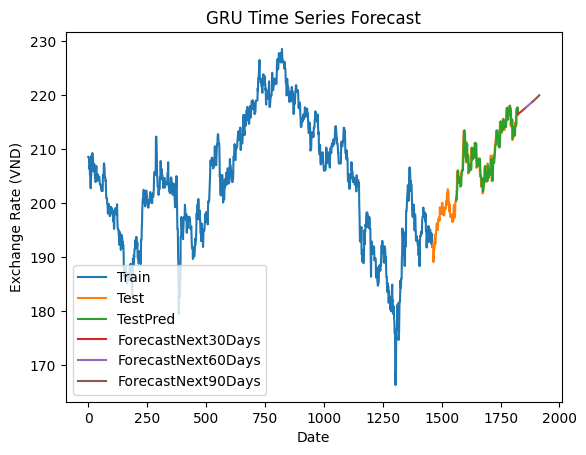

- Model accuracy evaluation: 
RMSE = 1.4376926786171262
MAPE = 0.5140241880882069
MAE = 1.0765779799941038


In [62]:
implementGRU(train_gbp_2_sc, test_gbp_2_sc)

* Case 9:1

Epoch 1/100


C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.1540 - val_loss: 0.0013
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0060 - val_loss: 0.0017
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0037 - val_loss: 0.0024
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0025 - val_loss: 0.0016
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0018 - val_loss: 6.6410e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0012 - val_loss: 5.5756e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 8.9108e-04 - val_loss: 3.8580e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 7.5240e-04 - val_loss: 3.2653e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 6.9770e-04 - val_loss: 3.2060e-04
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 7.5734e-04 - val_loss: 3.1448e-04
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 6.9398e-04 - val_loss: 3.4558e-04
Epoch 12/100
25/

Epoch 65/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 4.5098e-04 - val_loss: 2.4985e-04
Epoch 66/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 4.8986e-04 - val_loss: 2.4434e-04
Epoch 67/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 5.2975e-04 - val_loss: 2.4831e-04
Epoch 68/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 4.5494e-04 - val_loss: 2.4392e-04
Epoch 69/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 4.7479e-04 - val_loss: 3.3555e-04
Epoch 70/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 4.7259e-04 - val_loss: 2.5502e-04
Epoch 71/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 4.6144e-04 - val_loss: 2.4373e-04
Epoch 72/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 4.4438e-04 - val_loss: 2.4221e-04
Epoch 73/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 4.2796e-04 - val_loss: 2.4815e-04
Epoch 74/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 5.0322e-04 - val_loss: 2.4393e-04
Epoch 75/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/st

4 day output [[0.8296185]]
5 day input [0.73450723 0.75580126 0.75279825 0.75648376 0.75648376 0.75648376
 0.74979525 0.74105924 0.73027573 0.72167622 0.71048321 0.71048321
 0.71048321 0.71116571 0.71280371 0.70611521 0.74542725 0.78132678
 0.78132678 0.78132678 0.77354627 0.77764128 0.76180726 0.74938575
 0.75593776 0.75593776 0.75593776 0.75880426 0.76822277 0.78200928
 0.79183729 0.76535627 0.76535627 0.76535627 0.76931477 0.78924379
 0.75812176 0.78241878 0.76781327 0.76781327 0.76781327 0.76713077
 0.78692329 0.7959323  0.81094731 0.82350532 0.82350532 0.82350532
 0.80644281 0.79429429 0.78910729 0.8043953  0.8034398  0.8034398
 0.8034398  0.80985531 0.82295932 0.82555283 0.83114933 0.82241332
 0.82241332 0.82241332 0.80835381 0.77231777 0.78269178 0.76835927
 0.78883429 0.78883429 0.78883429 0.75279825 0.72836473 0.76194376
 0.76412776 0.76030576 0.76030576 0.76030576 0.76385476 0.76904177
 0.73983074 0.74406224 0.76999727 0.76999727 0.76999727 0.78228228
 0.76972427 0.77559378 0

13 day output [[0.8763803]]
14 day input [0.72167622 0.71048321 0.71048321 0.71048321 0.71116571 0.71280371
 0.70611521 0.74542725 0.78132678 0.78132678 0.78132678 0.77354627
 0.77764128 0.76180726 0.74938575 0.75593776 0.75593776 0.75593776
 0.75880426 0.76822277 0.78200928 0.79183729 0.76535627 0.76535627
 0.76535627 0.76931477 0.78924379 0.75812176 0.78241878 0.76781327
 0.76781327 0.76781327 0.76713077 0.78692329 0.7959323  0.81094731
 0.82350532 0.82350532 0.82350532 0.80644281 0.79429429 0.78910729
 0.8043953  0.8034398  0.8034398  0.8034398  0.80985531 0.82295932
 0.82555283 0.83114933 0.82241332 0.82241332 0.82241332 0.80835381
 0.77231777 0.78269178 0.76835927 0.78883429 0.78883429 0.78883429
 0.75279825 0.72836473 0.76194376 0.76412776 0.76030576 0.76030576
 0.76030576 0.76385476 0.76904177 0.73983074 0.74406224 0.76999727
 0.76999727 0.76999727 0.78228228 0.76972427 0.77559378 0.81927382
 0.82022932 0.82022932 0.82022932 0.82637183 0.82159432 0.8030303
 0.81572482 0.8030303 

23 day output [[0.93016875]]
24 day input [0.78132678 0.77354627 0.77764128 0.76180726 0.74938575 0.75593776
 0.75593776 0.75593776 0.75880426 0.76822277 0.78200928 0.79183729
 0.76535627 0.76535627 0.76535627 0.76931477 0.78924379 0.75812176
 0.78241878 0.76781327 0.76781327 0.76781327 0.76713077 0.78692329
 0.7959323  0.81094731 0.82350532 0.82350532 0.82350532 0.80644281
 0.79429429 0.78910729 0.8043953  0.8034398  0.8034398  0.8034398
 0.80985531 0.82295932 0.82555283 0.83114933 0.82241332 0.82241332
 0.82241332 0.80835381 0.77231777 0.78269178 0.76835927 0.78883429
 0.78883429 0.78883429 0.75279825 0.72836473 0.76194376 0.76412776
 0.76030576 0.76030576 0.76030576 0.76385476 0.76904177 0.73983074
 0.74406224 0.76999727 0.76999727 0.76999727 0.78228228 0.76972427
 0.77559378 0.81927382 0.82022932 0.82022932 0.82022932 0.82637183
 0.82159432 0.8030303  0.81572482 0.8030303  0.81092685 0.81472015
 0.81960857 0.82459277 0.82961851 0.83469152 0.83980334 0.84495038
 0.85012764 0.8553320

32 day output [[0.9796953]]
33 day input [0.76822277 0.78200928 0.79183729 0.76535627 0.76535627 0.76535627
 0.76931477 0.78924379 0.75812176 0.78241878 0.76781327 0.76781327
 0.76781327 0.76713077 0.78692329 0.7959323  0.81094731 0.82350532
 0.82350532 0.82350532 0.80644281 0.79429429 0.78910729 0.8043953
 0.8034398  0.8034398  0.8034398  0.80985531 0.82295932 0.82555283
 0.83114933 0.82241332 0.82241332 0.82241332 0.80835381 0.77231777
 0.78269178 0.76835927 0.78883429 0.78883429 0.78883429 0.75279825
 0.72836473 0.76194376 0.76412776 0.76030576 0.76030576 0.76030576
 0.76385476 0.76904177 0.73983074 0.74406224 0.76999727 0.76999727
 0.76999727 0.78228228 0.76972427 0.77559378 0.81927382 0.82022932
 0.82022932 0.82022932 0.82637183 0.82159432 0.8030303  0.81572482
 0.8030303  0.81092685 0.81472015 0.81960857 0.82459277 0.82961851
 0.83469152 0.83980334 0.84495038 0.85012764 0.85533202 0.86056095
 0.86581302 0.87108654 0.87638032 0.88169295 0.88702333 0.89236933
 0.89773059 0.90310615

41 day output [[1.0301874]]
42 day input [0.78241878 0.76781327 0.76781327 0.76781327 0.76713077 0.78692329
 0.7959323  0.81094731 0.82350532 0.82350532 0.82350532 0.80644281
 0.79429429 0.78910729 0.8043953  0.8034398  0.8034398  0.8034398
 0.80985531 0.82295932 0.82555283 0.83114933 0.82241332 0.82241332
 0.82241332 0.80835381 0.77231777 0.78269178 0.76835927 0.78883429
 0.78883429 0.78883429 0.75279825 0.72836473 0.76194376 0.76412776
 0.76030576 0.76030576 0.76030576 0.76385476 0.76904177 0.73983074
 0.74406224 0.76999727 0.76999727 0.76999727 0.78228228 0.76972427
 0.77559378 0.81927382 0.82022932 0.82022932 0.82022932 0.82637183
 0.82159432 0.8030303  0.81572482 0.8030303  0.81092685 0.81472015
 0.81960857 0.82459277 0.82961851 0.83469152 0.83980334 0.84495038
 0.85012764 0.85533202 0.86056095 0.86581302 0.87108654 0.87638032
 0.88169295 0.88702333 0.89236933 0.89773059 0.90310615 0.90849596
 0.91389865 0.91931009 0.92473251 0.93016875 0.93561834 0.94108182
 0.94655836 0.95204973

50 day output [[1.081453]]
51 day input [0.82350532 0.82350532 0.80644281 0.79429429 0.78910729 0.8043953
 0.8034398  0.8034398  0.8034398  0.80985531 0.82295932 0.82555283
 0.83114933 0.82241332 0.82241332 0.82241332 0.80835381 0.77231777
 0.78269178 0.76835927 0.78883429 0.78883429 0.78883429 0.75279825
 0.72836473 0.76194376 0.76412776 0.76030576 0.76030576 0.76030576
 0.76385476 0.76904177 0.73983074 0.74406224 0.76999727 0.76999727
 0.76999727 0.78228228 0.76972427 0.77559378 0.81927382 0.82022932
 0.82022932 0.82022932 0.82637183 0.82159432 0.8030303  0.81572482
 0.8030303  0.81092685 0.81472015 0.81960857 0.82459277 0.82961851
 0.83469152 0.83980334 0.84495038 0.85012764 0.85533202 0.86056095
 0.86581302 0.87108654 0.87638032 0.88169295 0.88702333 0.89236933
 0.89773059 0.90310615 0.90849596 0.91389865 0.91931009 0.92473251
 0.93016875 0.93561834 0.94108182 0.94655836 0.95204973 0.95755488
 0.96307141 0.96860063 0.97414225 0.97969532 0.98525912 0.990834
 0.99642056 1.00202155 1.

60 day output [[1.1388962]]
61 day input [0.82295932 0.82555283 0.83114933 0.82241332 0.82241332 0.82241332
 0.80835381 0.77231777 0.78269178 0.76835927 0.78883429 0.78883429
 0.78883429 0.75279825 0.72836473 0.76194376 0.76412776 0.76030576
 0.76030576 0.76030576 0.76385476 0.76904177 0.73983074 0.74406224
 0.76999727 0.76999727 0.76999727 0.78228228 0.76972427 0.77559378
 0.81927382 0.82022932 0.82022932 0.82022932 0.82637183 0.82159432
 0.8030303  0.81572482 0.8030303  0.81092685 0.81472015 0.81960857
 0.82459277 0.82961851 0.83469152 0.83980334 0.84495038 0.85012764
 0.85533202 0.86056095 0.86581302 0.87108654 0.87638032 0.88169295
 0.88702333 0.89236933 0.89773059 0.90310615 0.90849596 0.91389865
 0.91931009 0.92473251 0.93016875 0.93561834 0.94108182 0.94655836
 0.95204973 0.95755488 0.96307141 0.96860063 0.97414225 0.97969532
 0.98525912 0.990834   0.99642056 1.00202155 1.00763309 1.01325607
 1.01888895 1.0245316  1.03018737 1.03585017 1.04152513 1.04720843
 1.0529002  1.0585994

70 day output [[1.1961234]]
71 day input [0.78883429 0.78883429 0.78883429 0.75279825 0.72836473 0.76194376
 0.76412776 0.76030576 0.76030576 0.76030576 0.76385476 0.76904177
 0.73983074 0.74406224 0.76999727 0.76999727 0.76999727 0.78228228
 0.76972427 0.77559378 0.81927382 0.82022932 0.82022932 0.82022932
 0.82637183 0.82159432 0.8030303  0.81572482 0.8030303  0.81092685
 0.81472015 0.81960857 0.82459277 0.82961851 0.83469152 0.83980334
 0.84495038 0.85012764 0.85533202 0.86056095 0.86581302 0.87108654
 0.87638032 0.88169295 0.88702333 0.89236933 0.89773059 0.90310615
 0.90849596 0.91389865 0.91931009 0.92473251 0.93016875 0.93561834
 0.94108182 0.94655836 0.95204973 0.95755488 0.96307141 0.96860063
 0.97414225 0.97969532 0.98525912 0.990834   0.99642056 1.00202155
 1.00763309 1.01325607 1.01888895 1.0245316  1.03018737 1.03585017
 1.04152513 1.04720843 1.0529002  1.05859947 1.06430435 1.07001531
 1.07573164 1.08145297 1.0871805  1.09291422 1.09865475 1.10439956
 1.1101476  1.1158962

78 day output [[1.2410395]]
79 day input [0.76030576 0.76030576 0.76385476 0.76904177 0.73983074 0.74406224
 0.76999727 0.76999727 0.76999727 0.78228228 0.76972427 0.77559378
 0.81927382 0.82022932 0.82022932 0.82022932 0.82637183 0.82159432
 0.8030303  0.81572482 0.8030303  0.81092685 0.81472015 0.81960857
 0.82459277 0.82961851 0.83469152 0.83980334 0.84495038 0.85012764
 0.85533202 0.86056095 0.86581302 0.87108654 0.87638032 0.88169295
 0.88702333 0.89236933 0.89773059 0.90310615 0.90849596 0.91389865
 0.91931009 0.92473251 0.93016875 0.93561834 0.94108182 0.94655836
 0.95204973 0.95755488 0.96307141 0.96860063 0.97414225 0.97969532
 0.98525912 0.990834   0.99642056 1.00202155 1.00763309 1.01325607
 1.01888895 1.0245316  1.03018737 1.03585017 1.04152513 1.04720843
 1.0529002  1.05859947 1.06430435 1.07001531 1.07573164 1.08145297
 1.0871805  1.09291422 1.09865475 1.10439956 1.1101476  1.11589622
 1.12164652 1.12739778 1.13314807 1.13889623 1.14464104 1.15038323
 1.15612137 1.1618559

86 day output [[1.2843505]]
87 day input [0.76999727 0.78228228 0.76972427 0.77559378 0.81927382 0.82022932
 0.82022932 0.82022932 0.82637183 0.82159432 0.8030303  0.81572482
 0.8030303  0.81092685 0.81472015 0.81960857 0.82459277 0.82961851
 0.83469152 0.83980334 0.84495038 0.85012764 0.85533202 0.86056095
 0.86581302 0.87108654 0.87638032 0.88169295 0.88702333 0.89236933
 0.89773059 0.90310615 0.90849596 0.91389865 0.91931009 0.92473251
 0.93016875 0.93561834 0.94108182 0.94655836 0.95204973 0.95755488
 0.96307141 0.96860063 0.97414225 0.97969532 0.98525912 0.990834
 0.99642056 1.00202155 1.00763309 1.01325607 1.01888895 1.0245316
 1.03018737 1.03585017 1.04152513 1.04720843 1.0529002  1.05859947
 1.06430435 1.07001531 1.07573164 1.08145297 1.0871805  1.09291422
 1.09865475 1.10439956 1.1101476  1.11589622 1.12164652 1.12739778
 1.13314807 1.13889623 1.14464104 1.15038323 1.15612137 1.16185594
 1.1675849  1.17330754 1.1790247  1.18473637 1.19043481 1.19612336
 1.20179558 1.2074542  1

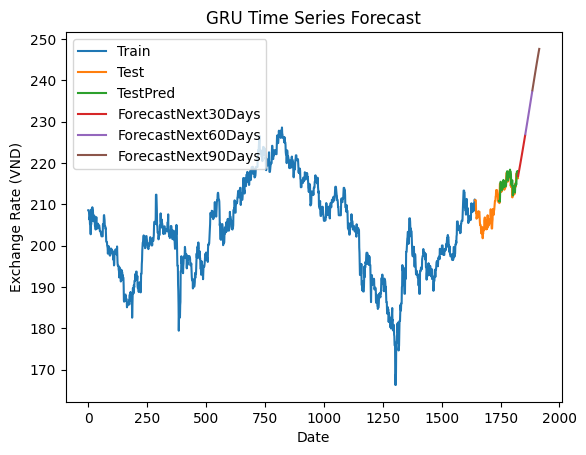

- Model accuracy evaluation: 
RMSE = 1.3220199355770468
MAPE = 0.4483933783210395
MAE = 0.9633797076628234


In [63]:
implementGRU(train_gbp_3_sc, test_gbp_3_sc)